<a href="https://colab.research.google.com/github/EmanRafik/Modulation-Classification/blob/master/Modulation_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!tar -xf "/content/drive/My Drive/RML2016.10b.tar"

In [ ]:
import pickle
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Reshape, Flatten
from keras import metrics
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
Xd = pickle.load(open("/content/RML2016.10b.dat",'rb'), encoding="latin1")
snrs,mods = map(lambda j: sorted(list(set(map(lambda x: x[j], Xd.keys())))), [1,0])
X = []  
lbl = []
for mod in mods:
    for snr in snrs:
        X.append(Xd[(mod,snr)])
        for i in range(Xd[(mod,snr)].shape[0]):  lbl.append((mod,snr))
X = np.vstack(X)
print(X.shape)
labels = np.array(lbl)
print(labels.shape)
print(np.array(mods).shape)
del Xd
del lbl

(1200000, 2, 128)
(1200000, 2)
(10,)


In [ ]:
X_integ = [];
for i in range(len(X)):
  first_func = X[i][0]
  second_func = X[i][1]
  p1 = np.poly1d(first_func)
  d1 = np.polyint(p1)
  p2 = np.poly1d(second_func)
  d2 = np.polyint(p2)
  first_func_integ = np.array(d1)
  second_func_integ = np.array(d2)
  current = []
  current.append(first_func_integ)
  current.append(second_func_integ)
  X_integ.append(current)
X_integ = np.array(X_integ)
print(X_integ.shape)

(1200000, 2, 129)


In [ ]:
X_deriv = [];
for i in range(len(X)):
  first_func = X[i][0]
  second_func = X[i][1]
  p1 = np.poly1d(first_func)
  d1 = np.polyder(p1)
  p2 = np.poly1d(second_func)
  d2 = np.polyder(p2)
  first_func_derivative = [0]
  first_func_derivative = np.concatenate([first_func_derivative, np.array(d1)])
  second_func_derivative = [0]
  second_func_derivative = np.concatenate([second_func_derivative, np.array(d2)])
  current = []
  current.append(first_func_derivative)
  current.append(second_func_derivative)
  X_deriv.append(current)
X_deriv = np.array(X_deriv)
print(X_deriv.shape)

(1200000, 2, 128)


In [ ]:
X_modified = []
for i in range(len(X)):
  first_func = X[i][0]
  second_func = X[i][1]
  first_func = np.concatenate([[0], first_func])
  second_func = np.concatenate([[0], second_func])
  current = []
  current.append(first_func)
  current.append(second_func)
  X_modified.append(current)
X_modified = np.array(X_modified)
print(X_modified.shape)

(1200000, 2, 129)


In [ ]:
X_deriv_modified = []
for i in range(len(X_deriv)):
  first_func = X_deriv[i][0]
  second_func = X_deriv[i][1]
  first_func = np.concatenate([[0], first_func])
  second_func = np.concatenate([[0], second_func])
  current = []
  current.append(first_func)
  current.append(second_func)
  X_deriv_modified.append(current)
X_deriv_modified = np.array(X_deriv_modified)
print(X_deriv_modified.shape)

(1200000, 2, 129)


In [ ]:
X = X.reshape(X.shape[0], 1, 2, 128)
X_deriv = X_deriv.reshape(X_deriv.shape[0], 1, 2, 128)

In [ ]:
X_raw_der = np.append(X, np.atleast_3d(X_deriv), axis=1)
print(X_raw_der.shape)

(1200000, 4, 128)


In [ ]:
X_modified = X_modified.reshape(X_modified.shape[0], 1, 2, 129)
X_integ = X_integ.reshape(X_integ.shape[0], 1, 2, 129)

In [ ]:
X_raw_int = np.append(X_modified, np.atleast_3d(X_integ), axis=1)
print(X_raw_int.shape)

(1200000, 4, 129)


In [ ]:
X_deriv_modified = X_deriv_modified.reshape(X_deriv_modified.shape[0], 1, 2, 129)
X_integ = X_integ.reshape(X_integ.shape[0], 1, 2, 129)

In [ ]:
X_der_int = np.append(X_deriv_modified, np.atleast_3d(X_integ), axis=1)
print(X_der_int.shape)

(1200000, 2, 2, 129)


In [ ]:
X_modified = X_modified.reshape(X_modified.shape[0], 1, 2, 129)
X_deriv_modified = X_deriv_modified.reshape(X_deriv_modified.shape[0], 1, 2, 129)
X_integ = X_integ.reshape(X_integ.shape[0], 1, 2, 129)

In [ ]:
X_raw_der_int = np.append(X_modified, np.atleast_3d(X_deriv_modified), axis=1)
X_raw_der_int = np.append(X_raw_der_int, np.atleast_3d(X_integ), axis=1)
print(X_raw_der_int.shape)

(1200000, 6, 129)


In [ ]:
del X

In [ ]:
del X_deriv

In [ ]:
del X_integ

In [ ]:
del X_modified

In [ ]:
del X_deriv_modified

In [ ]:
del X_raw_der

In [ ]:
del X_raw_int

In [ ]:
del X_der_int

In [ ]:
del X_raw_der_int

In [ ]:
def split_data(X, Y):
  X_train_val, X_test, Y_train_val, Y_test = train_test_split(X, Y, test_size=0.3)
  del X
  del Y
  X_train, X_val, Y_train, Y_val = train_test_split(X_train_val, Y_train_val, test_size=0.05)
  del X_train_val
  del Y_train_val
  return X_train, Y_train, X_val, Y_val, X_test, Y_test

In [ ]:
def arange_output(Y):
  Y_new = np.zeros((Y.shape[0], 10))
  for i in range(Y.shape[0]):
    Y_new[i][mods.index(Y[i][0])] = 1
  return Y_new

In [ ]:
#raw data
X_train, Y_train, X_val, Y_val, X_test, Y_test = split_data(X, labels)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1] * X_train.shape[2]))
X_val = X_val.reshape((X_val.shape[0], X_val.shape[1] * X_val.shape[2]))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1] * X_test.shape[2]))
# print(X_train.shape)

In [ ]:
#derivative
X_train_der, Y_train_der, X_val_der, Y_val_der, X_test_der, Y_test_der = split_data(X_deriv, labels)
X_train_der = X_train_der.reshape((X_train_der.shape[0], X_train_der.shape[1] * X_train_der.shape[2]))
X_val_der = X_val_der.reshape((X_val_der.shape[0], X_val_der.shape[1] * X_val_der.shape[2]))
X_test_der = X_test_der.reshape((X_test_der.shape[0], X_test_der.shape[1] * X_test_der.shape[2]))

In [ ]:
#integral
X_train_int, Y_train_int, X_val_int, Y_val_int, X_test_int, Y_test_int = split_data(X_integ, labels)
X_train_int = X_train_int.reshape((X_train_int.shape[0], X_train_int.shape[1] * X_train_int.shape[2]))
X_val_int = X_val_int.reshape((X_val_int.shape[0], X_val_int.shape[1] * X_val_int.shape[2]))
X_test_int = X_test_int.reshape((X_test_int.shape[0], X_test_int.shape[1] * X_test_int.shape[2]))

In [ ]:
#raw der
X_train_raw_der, Y_train_raw_der, X_val_raw_der, Y_val_raw_der, X_test_raw_der, Y_test_raw_der = split_data(X_raw_der, labels)
X_train_raw_der = X_train_raw_der.reshape((X_train_raw_der.shape[0], X_train_raw_der.shape[1] * X_train_raw_der.shape[2]))
X_val_raw_der = X_val_raw_der.reshape((X_val_raw_der.shape[0], X_val_raw_der.shape[1] * X_val_raw_der.shape[2]))
X_test_raw_der = X_test_raw_der.reshape((X_test_raw_der.shape[0], X_test_raw_der.shape[1] * X_test_raw_der.shape[2]))

In [ ]:
#raw int
X_train_raw_int, Y_train_raw_int, X_val_raw_int, Y_val_raw_int, X_test_raw_int, Y_test_raw_int = split_data(X_raw_int, labels)
X_train_raw_int = X_train_raw_int.reshape((X_train_raw_int.shape[0], X_train_raw_int.shape[1] * X_train_raw_int.shape[2]))
X_val_raw_int = X_val_raw_int.reshape((X_val_raw_int.shape[0], X_val_raw_int.shape[1] * X_val_raw_int.shape[2]))
X_test_raw_int = X_test_raw_int.reshape((X_test_raw_int.shape[0], X_test_raw_int.shape[1] * X_test_raw_int.shape[2]))

In [ ]:
#der int
X_train_der_int, Y_train_der_int, X_val_der_int, Y_val_der_int, X_test_der_int, Y_test_der_int = split_data(X_der_int, labels)
X_train_der_int = X_train_der_int.reshape((X_train_der_int.shape[0], X_train_der_int.shape[1] * X_train_der_int.shape[2]))
X_val_der_int = X_val_der_int.reshape((X_val_der_int.shape[0], X_val_der_int.shape[1] * X_val_der_int.shape[2]))
X_test_der_int = X_test_der_int.reshape((X_test_der_int.shape[0], X_test_der_int.shape[1] * X_test_der_int.shape[2]))

In [ ]:
#raw, deriv, integ combinations
X_train_raw_der_int, Y_train_raw_der_int, X_val_raw_der_int, Y_val_raw_der_int, X_test_raw_der_int, Y_test_raw_der_int = split_data(X_raw_der_int, labels)
X_train_raw_der_int = X_train_raw_der_int.reshape((X_train_raw_der_int.shape[0], X_train_raw_der_int.shape[1] * X_train_raw_der_int.shape[2]))
X_val_raw_der_int = X_val_raw_der_int.reshape((X_val_raw_der_int.shape[0], X_val_raw_der_int.shape[1] * X_val_raw_der_int.shape[2]))
X_test_raw_der_int = X_test_raw_der_int.reshape((X_test_raw_der_int.shape[0], X_test_raw_der_int.shape[1] * X_test_raw_der_int.shape[2]))

# 1) Logistic Regression

###Using raw data

In [ ]:
logistic_classifier = LogisticRegression().fit(X_train, Y_train[:,0])

val_acc = logistic_classifier.score(X_val, Y_val[:,0])

print("Validation accuracy: ", val_acc)

Validation accuracy:  0.15978571428571428


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
logistic_classifier = LogisticRegression(max_iter=1000).fit(X_train, Y_train[:,0])

val_acc = logistic_classifier.score(X_val, Y_val[:,0])

print("Validation accuracy: ", val_acc)

Validation accuracy:  0.15773809523809523


In [ ]:
logistic_classifier = LogisticRegression(max_iter=500).fit(X_train, Y_train[:,0])

val_acc = logistic_classifier.score(X_val, Y_val[:,0])

print("Validation accuracy: ", val_acc)

Validation accuracy:  0.15773809523809523


In [ ]:
test_acc = logistic_classifier.score(X_test, Y_test[:,0])
print("Test accuracy: ", test_acc)

Test accuracy:  0.15805555555555556


In [ ]:
acc = []
for snr in snrs:
  print("SNR ==> ", snr)
  X_test_snr = X_test[np.argwhere(Y_test[:,1] == str(snr))]
  X_test_snr = X_test_snr.reshape((X_test_snr.shape[0], X_test_snr.shape[2]))
  Y_test_snr = Y_test[np.argwhere(Y_test[:,1] == str(snr))]
  Y_test_snr = Y_test_snr.reshape((Y_test_snr.shape[0], Y_test_snr.shape[2]))
  print(logistic_classifier.score(X_test_snr, Y_test_snr[:,0]))

  y_pred =logistic_classifier.predict(X_test_snr)
  Y_test_snr = arange_output(Y_test_snr)
  Y_pred = np.zeros((y_pred.shape[0], 10))
  for i in range(y_pred.shape[0]):
    Y_pred[i][mods.index(y_pred[i])] = 1
  cm = confusion_matrix(Y_test_snr.argmax(axis=1), Y_pred.argmax(axis=1))
  print(cm)
  true_values = np.sum(np.diag(cm))
  accuracy = true_values / np.sum(cm)
  print("Accuracy: ", accuracy)
  acc.append(accuracy)
  print()
acc = np.array(acc)

SNR ==>  -20
0.09980657640232109
[[233   1 234 253 266 208 194 187 223  14]
 [198   6 204 255 285 185 221 167 260  32]
 [240   4 231 263 295 205 212 174 251  13]
 [254   5 249 277 285 181 190 165 237  21]
 [221   2 239 240 248 187 202 166 238  20]
 [209   2 236 263 259 173 199 167 235  11]
 [211   1 249 251 290 200 185 183 218  16]
 [217   5 232 238 279 201 189 181 245  20]
 [225   1 238 227 284 190 199 177 241  13]
 [203   7 217 236 288 210 190 172 240  31]]
Accuracy:  0.09980657640232109

SNR ==>  -18
0.1023853007914107
[[219   1 262 257 266 180 176 166 236  18]
 [227  10 220 243 264 210 164 191 242  39]
 [219   3 265 260 289 205 186 169 244  19]
 [217   2 234 262 278 203 195 155 246  16]
 [210   5 234 237 272 207 177 175 267  18]
 [235   4 250 209 310 226 166 167 224  30]
 [234   4 242 244 278 193 184 182 239  23]
 [216   4 263 250 297 193 193 155 225  33]
 [211   2 213 261 270 202 190 170 219  21]
 [197   5 237 257 256 171 185 199 232  38]]
Accuracy:  0.1023853007914107

SNR ==>  -

Text(0, 0.5, 'Accuracy')

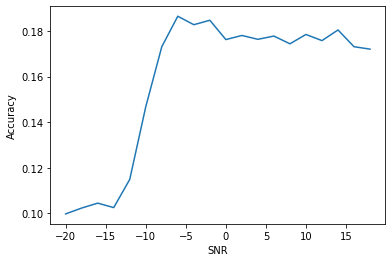

In [ ]:
plt.plot(snrs, acc)
plt.xlabel("SNR")
plt.ylabel("Accuracy")

### using the derivative

In [ ]:
logistic_classifier = LogisticRegression(max_iter=500).fit(X_train_der, Y_train_der[:,0])

val_acc = logistic_classifier.score(X_val_der, Y_val_der[:,0])

print("Validation accuracy: ", val_acc)

Validation accuracy:  0.15947619047619047


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
logistic_classifier = LogisticRegression(max_iter=1000).fit(X_train_der, Y_train_der[:,0])

val_acc = logistic_classifier.score(X_val_der, Y_val_der[:,0])

print("Validation accuracy: ", val_acc)

Validation accuracy:  0.15995238095238096


In [ ]:
test_acc = logistic_classifier.score(X_test_der, Y_test_der[:,0])
print("Test accuracy: ", test_acc)

Test accuracy:  0.16022777777777777


In [ ]:
acc = []
for snr in snrs:
  print("SNR ==> ", snr)
  X_test_snr = X_test_der[np.argwhere(Y_test_der[:,1] == str(snr))]
  X_test_snr = X_test_snr.reshape((X_test_snr.shape[0], X_test_snr.shape[2]))
  Y_test_snr = Y_test_der[np.argwhere(Y_test_der[:,1] == str(snr))]
  Y_test_snr = Y_test_snr.reshape((Y_test_snr.shape[0], Y_test_snr.shape[2]))
  print(logistic_classifier.score(X_test_snr, Y_test_snr[:,0]))

  y_pred =logistic_classifier.predict(X_test_snr)
  Y_test_snr = arange_output(Y_test_snr)
  Y_pred = np.zeros((y_pred.shape[0], 10))
  for i in range(y_pred.shape[0]):
    Y_pred[i][mods.index(y_pred[i])] = 1
  cm = confusion_matrix(Y_test_snr.argmax(axis=1), Y_pred.argmax(axis=1))
  print(cm)
  true_values = np.sum(np.diag(cm))
  accuracy = true_values / np.sum(cm)
  print("Accuracy: ", accuracy)
  acc.append(accuracy)
  print()
acc = np.array(acc)

SNR ==>  -20
0.10086567997765987
[[255   9 278 252 193 213 173 154 230  21]
 [267  12 235 241 208 230 197 157 234  31]
 [246  10 239 241 221 209 178 186 246   8]
 [242   8 275 264 223 215 165 152 228  17]
 [237   9 243 267 190 210 191 165 252  20]
 [234   7 253 246 218 226 164 169 233  16]
 [230   2 247 266 225 216 187 156 237  12]
 [242   5 270 248 198 216 186 191 220  21]
 [224   5 276 255 211 218 204 180 218  24]
 [227  12 251 231 201 224 204 193 235  24]]
Accuracy:  0.10086567997765987

SNR ==>  -18
0.10310489510489511
[[241   8 262 248 207 181 193 172 241  12]
 [215  17 269 244 217 221 188 175 227  40]
 [235  12 254 250 229 226 194 174 237  18]
 [215   5 238 262 224 199 176 176 217  25]
 [228   8 274 253 222 201 173 180 228  16]
 [264   8 265 248 215 216 186 157 239  20]
 [250   9 245 227 224 231 188 176 202  23]
 [216   8 275 227 196 201 213 180 219  29]
 [247   6 240 263 224 236 201 179 230  15]
 [221  10 250 208 208 222 191 190 217  33]]
Accuracy:  0.10310489510489511

SNR ==> 

Text(0, 0.5, 'Accuracy')

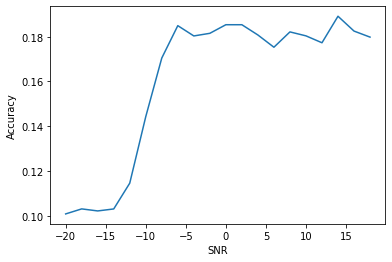

In [ ]:
plt.plot(snrs, acc)
plt.xlabel("SNR")
plt.ylabel("Accuracy")

###Using the integral

In [ ]:
logistic_classifier = LogisticRegression().fit(X_train_int, Y_train_int[:,0])

val_acc = logistic_classifier.score(X_val_int, Y_val_int[:,0])

print("Validation accuracy: ", val_acc)

Validation accuracy:  0.13252380952380952


In [ ]:
test_acc = logistic_classifier.score(X_test_int, Y_test_int[:,0])
print("Test accuracy: ", test_acc)

Test accuracy:  0.13461666666666666


In [ ]:
acc = []
for snr in snrs:
  print("SNR ==> ", snr)
  X_test_snr = X_test_int[np.argwhere(Y_test_int[:,1] == str(snr))]
  X_test_snr = X_test_snr.reshape((X_test_snr.shape[0], X_test_snr.shape[2]))
  Y_test_snr = Y_test_int[np.argwhere(Y_test_int[:,1] == str(snr))]
  Y_test_snr = Y_test_snr.reshape((Y_test_snr.shape[0], Y_test_snr.shape[2]))
  print(logistic_classifier.score(X_test_snr, Y_test_snr[:,0]))

  y_pred =logistic_classifier.predict(X_test_snr)
  Y_test_snr = arange_output(Y_test_snr)
  Y_pred = np.zeros((y_pred.shape[0], 10))
  for i in range(y_pred.shape[0]):
    Y_pred[i][mods.index(y_pred[i])] = 1
  cm = confusion_matrix(Y_test_snr.argmax(axis=1), Y_pred.argmax(axis=1))
  print(cm)
  true_values = np.sum(np.diag(cm))
  accuracy = true_values / np.sum(cm)
  print("Accuracy: ", accuracy)
  acc.append(accuracy)
  print()
acc = np.array(acc)

SNR ==>  -20
0.1006376490158026
[[318 290  55  19 263  63 249 177  58 271]
 [287 320  44  29 236  66 267 176  58 311]
 [352 329  42  20 269  69 247 166  70 276]
 [316 315  52  23 257  59 267 181  51 250]
 [328 318  38  25 246  55 273 180  60 280]
 [308 330  40  17 272  71 255 177  53 301]
 [333 309  41  17 255  64 238 174  61 280]
 [324 325  48  24 262  69 279 172  57 277]
 [319 318  42  20 258  74 268 181  58 274]
 [326 321  49  24 215  60 256 174  67 327]]
Accuracy:  0.1006376490158026

SNR ==>  -18
0.09534948482316903
[[304 301  38  24 271  48 318 179  58 299]
 [319 334  39  25 235  75 287 159  67 282]
 [325 330  48  24 254  60 254 169  60 271]
 [344 306  37  22 247  56 253 165  63 263]
 [321 298  62  18 240  79 246 182  53 297]
 [309 330  52  24 239  61 243 179  68 292]
 [311 291  49  23 251  61 237 194  51 283]
 [312 328  50  13 257  64 319 142  57 291]
 [318 291  44  21 259  73 252 172  53 290]
 [305 332  48  20 235  59 255 192  75 271]]
Accuracy:  0.09534948482316903

SNR ==>  -

Text(0, 0.5, 'Accuracy')

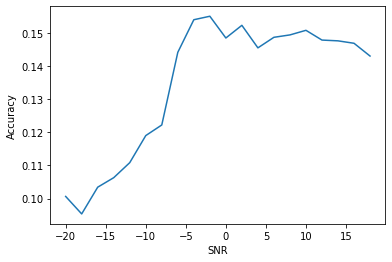

In [ ]:
plt.plot(snrs, acc)
plt.xlabel("SNR")
plt.ylabel("Accuracy")

###Using the raw, der combination

In [ ]:
logistic_classifier = LogisticRegression(max_iter=500).fit(X_train_raw_der, Y_train_raw_der[:,0])

val_acc = logistic_classifier.score(X_val_raw_der, Y_val_raw_der[:,0])

print("Validation accuracy: ", val_acc)

Validation accuracy:  0.1590238095238095


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
logistic_classifier = LogisticRegression(max_iter=1000).fit(X_train_raw_der, Y_train_raw_der[:,0])

val_acc = logistic_classifier.score(X_val_raw_der, Y_val_raw_der[:,0])

print("Validation accuracy: ", val_acc)

Validation accuracy:  0.15904761904761905


In [ ]:
test_acc = logistic_classifier.score(X_test_raw_der, Y_test_raw_der[:,0])
print("Test accuracy: ", test_acc)

Test accuracy:  0.16105


In [ ]:
acc = []
for snr in snrs:
  print("SNR ==> ", snr)
  X_test_snr = X_test_raw_der[np.argwhere(Y_test_raw_der[:,1] == str(snr))]
  X_test_snr = X_test_snr.reshape((X_test_snr.shape[0], X_test_snr.shape[2]))
  Y_test_snr = Y_test_raw_der[np.argwhere(Y_test_raw_der[:,1] == str(snr))]
  Y_test_snr = Y_test_snr.reshape((Y_test_snr.shape[0], Y_test_snr.shape[2]))
  print(logistic_classifier.score(X_test_snr, Y_test_snr[:,0]))

  y_pred =logistic_classifier.predict(X_test_snr)
  Y_test_snr = arange_output(Y_test_snr)
  Y_pred = np.zeros((y_pred.shape[0], 10))
  for i in range(y_pred.shape[0]):
    Y_pred[i][mods.index(y_pred[i])] = 1
  cm = confusion_matrix(Y_test_snr.argmax(axis=1), Y_pred.argmax(axis=1))
  print(cm)
  true_values = np.sum(np.diag(cm))
  accuracy = true_values / np.sum(cm)
  print("Accuracy: ", accuracy)
  acc.append(accuracy)
  print()
acc = np.array(acc)

SNR ==>  -20
0.10287518697025096
[[252   4 232 244 238 189 193 154 258  21]
 [217  16 235 276 241 185 196 163 273  26]
 [215  10 226 274 249 205 175 149 301  13]
 [229   4 237 278 234 194 193 169 270  20]
 [212   5 200 277 233 201 186 147 255  22]
 [235   4 232 264 224 222 183 156 278  20]
 [217   2 207 275 222 222 196 155 244  15]
 [239   6 201 277 229 229 203 167 282  20]
 [242   7 212 264 265 238 190 143 249  17]
 [240  14 208 287 238 179 187 155 276  18]]
Accuracy:  0.10287518697025096

SNR ==>  -18
0.09924433249370278
[[250   5 194 281 256 220 181 145 261  21]
 [245  14 205 279 233 175 190 160 280  46]
 [266  10 202 253 227 203 179 141 278  14]
 [254   7 237 261 249 189 192 169 277  18]
 [209   9 214 221 239 207 164 151 263  17]
 [219   8 209 279 252 199 172 169 251  32]
 [235  11 221 319 231 202 185 169 252  23]
 [229  13 222 244 214 210 193 163 278  28]
 [246   5 195 275 250 191 192 124 233  17]
 [237  15 197 263 220 183 170 153 279  27]]
Accuracy:  0.09924433249370278

SNR ==> 

Text(0, 0.5, 'Accuracy')

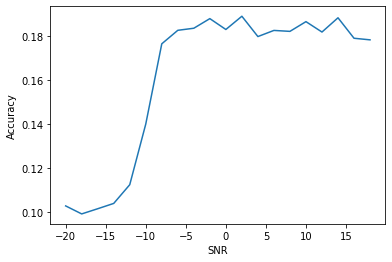

In [ ]:
plt.plot(snrs, acc)
plt.xlabel("SNR")
plt.ylabel("Accuracy")

###Using the raw, int combination

In [ ]:
logistic_classifier = LogisticRegression(max_iter=500).fit(X_train_raw_int, Y_train_raw_int[:,0])

val_acc = logistic_classifier.score(X_val_raw_int, Y_val_raw_int[:,0])

print("Validation accuracy: ", val_acc)

Validation accuracy:  0.15685714285714286


In [ ]:
test_acc = logistic_classifier.score(X_test_raw_int, Y_test_raw_int[:,0])
print("Test accuracy: ", test_acc)

Test accuracy:  0.1574222222222222


In [ ]:
acc = []
for snr in snrs:
  print("SNR ==> ", snr)
  X_test_snr = X_test_raw_int[np.argwhere(Y_test_raw_int[:,1] == str(snr))]
  X_test_snr = X_test_snr.reshape((X_test_snr.shape[0], X_test_snr.shape[2]))
  Y_test_snr = Y_test_raw_int[np.argwhere(Y_test_raw_int[:,1] == str(snr))]
  Y_test_snr = Y_test_snr.reshape((Y_test_snr.shape[0], Y_test_snr.shape[2]))
  print(logistic_classifier.score(X_test_snr, Y_test_snr[:,0]))

  y_pred =logistic_classifier.predict(X_test_snr)
  Y_test_snr = arange_output(Y_test_snr)
  Y_pred = np.zeros((y_pred.shape[0], 10))
  for i in range(y_pred.shape[0]):
    Y_pred[i][mods.index(y_pred[i])] = 1
  cm = confusion_matrix(Y_test_snr.argmax(axis=1), Y_pred.argmax(axis=1))
  print(cm)
  true_values = np.sum(np.diag(cm))
  accuracy = true_values / np.sum(cm)
  print("Accuracy: ", accuracy)
  acc.append(accuracy)
  print()
acc = np.array(acc)

SNR ==>  -20
0.09960818939352133
[[260   0 221 277 270 218 142 165 250  14]
 [243   2 227 293 273 208 139 162 250  32]
 [291   3 227 268 281 197 133 178 243  11]
 [266   3 220 305 290 205 143 153 261  16]
 [267   2 239 287 259 219 124 167 225  18]
 [262   4 236 281 261 215 102 164 233  16]
 [249   3 205 300 263 225 129 159 235  14]
 [257   3 231 278 266 214 121 154 251  21]
 [263   2 196 289 251 235 136 162 231  15]
 [266   4 225 297 285 223 118 163 238  23]]
Accuracy:  0.09960818939352133

SNR ==>  -18
0.10138299630833655
[[272   2 224 290 284 180 121 173 251  21]
 [259   4 223 283 270 247 117 138 216  40]
 [281   4 234 315 266 220 135 165 219  17]
 [246   3 218 284 284 239 127 185 234  22]
 [258   2 225 285 287 219 139 169 235  15]
 [260   2 213 303 270 198 121 173 233  25]
 [275   4 235 279 288 231 146 150 196  23]
 [248   3 212 274 266 211 140 166 254  30]
 [280   0 211 252 271 210 159 159 214  11]
 [249   4 198 300 250 229 134 157 250  35]]
Accuracy:  0.10138299630833655

SNR ==> 

Text(0, 0.5, 'Accuracy')

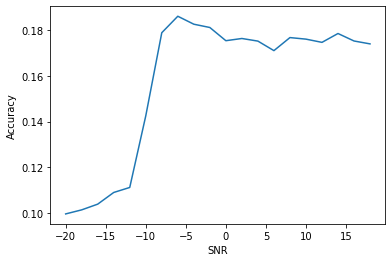

In [ ]:
plt.plot(snrs, acc)
plt.xlabel("SNR")
plt.ylabel("Accuracy")

###Using the der, int combination

In [ ]:
logistic_classifier = LogisticRegression().fit(X_train_der_int, Y_train_der_int[:,0])

val_acc = logistic_classifier.score(X_val_der_int, Y_val_der_int[:,0])

print("Validation accuracy: ", val_acc)

Validation accuracy:  0.16330952380952382


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
test_acc = logistic_classifier.score(X_test_der_int, Y_test_der_int[:,0])
print("Test accuracy: ", test_acc)

Test accuracy:  0.16124444444444444


In [ ]:
acc = []
for snr in snrs:
  print("SNR ==> ", snr)
  X_test_snr = X_test_der_int[np.argwhere(Y_test_der_int[:,1] == str(snr))]
  X_test_snr = X_test_snr.reshape((X_test_snr.shape[0], X_test_snr.shape[2]))
  Y_test_snr = Y_test_der_int[np.argwhere(Y_test_der_int[:,1] == str(snr))]
  Y_test_snr = Y_test_snr.reshape((Y_test_snr.shape[0], Y_test_snr.shape[2]))
  print(logistic_classifier.score(X_test_snr, Y_test_snr[:,0]))

  y_pred =logistic_classifier.predict(X_test_snr)
  Y_test_snr = arange_output(Y_test_snr)
  Y_pred = np.zeros((y_pred.shape[0], 10))
  for i in range(y_pred.shape[0]):
    Y_pred[i][mods.index(y_pred[i])] = 1
  cm = confusion_matrix(Y_test_snr.argmax(axis=1), Y_pred.argmax(axis=1))
  print(cm)
  true_values = np.sum(np.diag(cm))
  accuracy = true_values / np.sum(cm)
  print("Accuracy: ", accuracy)
  acc.append(accuracy)
  print()
acc = np.array(acc)

SNR ==>  -20
0.10077260852648547
[[241   9 208 251 233 190 206 159 299  14]
 [218  17 205 256 208 195 183 166 261  27]
 [249   4 236 224 250 172 167 169 311  18]
 [249   5 228 248 254 184 197 168 269  20]
 [227   4 256 259 229 189 174 168 275  22]
 [252   5 218 275 223 194 181 149 263  21]
 [203  10 217 257 206 202 183 191 300  15]
 [227   4 241 240 234 216 173 171 293  13]
 [239   5 230 264 229 218 155 185 275  20]
 [245   8 220 265 243 213 165 138 307  19]]
Accuracy:  0.10077260852648547

SNR ==>  -18
0.10470275066548358
[[233   7 229 232 253 194 160 144 290  15]
 [230  16 215 275 239 188 177 139 285  52]
 [237   7 245 279 226 192 160 184 277  16]
 [232   8 215 302 211 201 198 170 261  19]
 [227  15 225 285 235 197 154 155 287  18]
 [232   8 213 251 225 207 166 151 244  32]
 [248   7 217 277 228 190 183 151 260  15]
 [234  12 239 242 253 194 176 147 287  28]
 [252   6 240 267 249 208 176 159 283  13]
 [213  15 230 270 236 178 190 191 291  37]]
Accuracy:  0.10470275066548358

SNR ==> 

Text(0, 0.5, 'Accuracy')

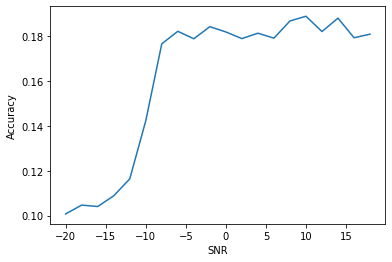

In [ ]:
plt.plot(snrs, acc)
plt.xlabel("SNR")
plt.ylabel("Accuracy")

###Using the raw, der and int combination

In [ ]:
logistic_classifier = LogisticRegression().fit(X_train_raw_der_int, Y_train_raw_der_int[:,0])

val_acc = logistic_classifier.score(X_val_raw_der_int, Y_val_raw_der_int[:,0])

print("Validation accuracy: ", val_acc)

Validation accuracy:  0.1615


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
test_acc = logistic_classifier.score(X_test_raw_der_int, Y_test_raw_der_int[:,0])
print("Test accuracy: ", test_acc)

Test accuracy:  0.16261944444444446


In [ ]:
acc = []
for snr in snrs:
  print("SNR ==> ", snr)
  X_test_snr = X_test_raw_der_int[np.argwhere(Y_test_raw_der_int[:,1] == str(snr))]
  X_test_snr = X_test_snr.reshape((X_test_snr.shape[0], X_test_snr.shape[2]))
  Y_test_snr = Y_test_raw_der_int[np.argwhere(Y_test_raw_der_int[:,1] == str(snr))]
  Y_test_snr = Y_test_snr.reshape((Y_test_snr.shape[0], Y_test_snr.shape[2]))
  print(logistic_classifier.score(X_test_snr, Y_test_snr[:,0]))

  y_pred =logistic_classifier.predict(X_test_snr)
  Y_test_snr = arange_output(Y_test_snr)
  Y_pred = np.zeros((y_pred.shape[0], 10))
  for i in range(y_pred.shape[0]):
    Y_pred[i][mods.index(y_pred[i])] = 1
  cm = confusion_matrix(Y_test_snr.argmax(axis=1), Y_pred.argmax(axis=1))
  print(cm)
  true_values = np.sum(np.diag(cm))
  accuracy = true_values / np.sum(cm)
  print("Accuracy: ", accuracy)
  acc.append(accuracy)
  print()
acc = np.array(acc)

SNR ==>  -20
0.10060068489305564
[[219   5 241 234 237 162 183 128 261  27]
 [239   9 226 256 225 189 223 166 244  34]
 [240   2 243 223 256 172 186 137 265  18]
 [238   8 263 275 227 186 187 149 275  14]
 [244   6 262 260 230 175 221 156 268  20]
 [237   6 243 281 232 179 223 140 275  20]
 [239   7 246 260 218 178 216 149 248  14]
 [250   6 233 255 234 207 216 148 249  21]
 [220   5 240 238 237 189 203 158 250  16]
 [229   6 239 246 230 163 154 150 273  23]]
Accuracy:  0.10060068489305564

SNR ==>  -18
0.09814191983238683
[[240   4 257 250 260 165 210 162 269  20]
 [239  12 233 258 221 177 216 140 265  42]
 [249   4 255 268 210 178 221 157 275  20]
 [222   8 263 219 260 170 204 150 248  20]
 [248   4 221 249 243 174 196 166 273  27]
 [249   3 238 263 236 171 230 149 272  26]
 [226   5 275 264 242 178 196 165 305  28]
 [231   3 261 248 247 166 211 147 262  30]
 [227   8 222 248 243 182 202 179 251  26]
 [227  13 243 243 234 177 206 149 242  46]]
Accuracy:  0.09814191983238683

SNR ==> 

Text(0, 0.5, 'Accuracy')

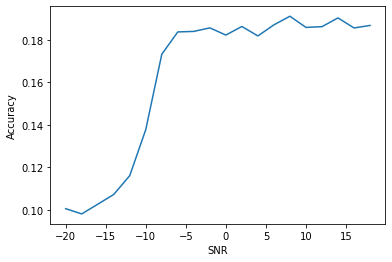

In [ ]:
plt.plot(snrs, acc)
plt.xlabel("SNR")
plt.ylabel("Accuracy")

# 2) Decision Trees

###Raw Data

In [ ]:
decision_tree = tree.DecisionTreeClassifier().fit(X_train, Y_train[:,0])
val_acc = decision_tree.score(X_val, Y_val[:,0])
print("Validation accuracy: ", val_acc)

Validation accuracy:  0.30783333333333335


In [ ]:
test_acc = decision_tree.score(X_test, Y_test[:,0])
print("Test accuracy: ", test_acc)

Test accuracy:  0.30970555555555557


In [ ]:
acc = []
for snr in snrs:
  print("SNR ==> ", snr)
  X_test_snr = X_test[np.argwhere(Y_test[:,1] == str(snr))]
  X_test_snr = X_test_snr.reshape((X_test_snr.shape[0], X_test_snr.shape[2]))
  Y_test_snr = Y_test[np.argwhere(Y_test[:,1] == str(snr))]
  Y_test_snr = Y_test_snr.reshape((Y_test_snr.shape[0], Y_test_snr.shape[2]))
  print(decision_tree.score(X_test_snr, Y_test_snr[:,0]))

  y_pred =decision_tree.predict(X_test_snr)
  Y_test_snr = arange_output(Y_test_snr)
  Y_pred = np.zeros((y_pred.shape[0], 10))
  for i in range(y_pred.shape[0]):
    Y_pred[i][mods.index(y_pred[i])] = 1
  cm = confusion_matrix(Y_test_snr.argmax(axis=1), Y_pred.argmax(axis=1))
  print(cm)
  true_values = np.sum(np.diag(cm))
  accuracy = true_values / np.sum(cm)
  print("Accuracy: ", accuracy)
  acc.append(accuracy)
  print()
acc = np.array(acc)

SNR ==>  -20
0.09737496546007185
[[211 166 210 160 190 179 176 135 212 174]
 [204 153 198 212 209 159 174 141 195 168]
 [218 176 206 206 195 164 155 137 236 195]
 [235 173 198 204 165 196 163 135 217 178]
 [220 171 183 192 193 166 151 130 225 132]
 [220 126 187 185 205 164 164 142 210 151]
 [228 153 188 216 209 149 157 140 201 163]
 [216 175 203 192 176 161 175 139 209 161]
 [204 139 216 204 180 160 182 142 199 169]
 [205 174 192 194 210 168 170 127 218 136]]
Accuracy:  0.09737496546007185

SNR ==>  -18
0.09923072665891859
[[203 156 193 215 185 163 163 129 208 166]
 [212 174 186 184 223 169 153 126 207 176]
 [238 166 180 204 205 155 145 156 228 182]
 [213 175 190 185 181 203 176 134 207 144]
 [220 167 186 218 196 162 168 130 218 137]
 [233 162 187 197 178 182 168 143 212 159]
 [207 155 212 213 197 187 156 139 211 146]
 [233 162 192 203 180 181 161 157 218 142]
 [225 145 224 189 182 160 146 134 205 149]
 [210 180 191 200 185 154 165 104 233 155]]
Accuracy:  0.09923072665891859

SNR ==> 

Text(0, 0.5, 'Accuracy')

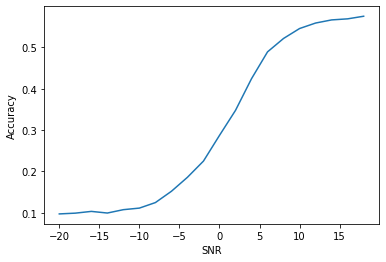

In [ ]:
plt.plot(snrs, acc)
plt.xlabel("SNR")
plt.ylabel("Accuracy")

###Using the derivative

In [ ]:
decision_tree = tree.DecisionTreeClassifier().fit(X_train_der, Y_train_der[:,0])
val_acc = decision_tree.score(X_val_der, Y_val_der[:,0])
print("Validation accuracy: ", val_acc)

Validation accuracy:  0.30576190476190473


In [ ]:
test_acc = decision_tree.score(X_test_der, Y_test_der[:,0])
print("Test accuracy: ", test_acc)

Test accuracy:  0.3077


In [ ]:
acc = []
for snr in snrs:
  print("SNR ==> ", snr)
  X_test_snr = X_test_der[np.argwhere(Y_test_der[:,1] == str(snr))]
  X_test_snr = X_test_snr.reshape((X_test_snr.shape[0], X_test_snr.shape[2]))
  Y_test_snr = Y_test_der[np.argwhere(Y_test_der[:,1] == str(snr))]
  Y_test_snr = Y_test_snr.reshape((Y_test_snr.shape[0], Y_test_snr.shape[2]))
  print(decision_tree.score(X_test_snr, Y_test_snr[:,0]))

  y_pred =decision_tree.predict(X_test_snr)
  Y_test_snr = arange_output(Y_test_snr)
  Y_pred = np.zeros((y_pred.shape[0], 10))
  for i in range(y_pred.shape[0]):
    Y_pred[i][mods.index(y_pred[i])] = 1
  cm = confusion_matrix(Y_test_snr.argmax(axis=1), Y_pred.argmax(axis=1))
  print(cm)
  true_values = np.sum(np.diag(cm))
  accuracy = true_values / np.sum(cm)
  print("Accuracy: ", accuracy)
  acc.append(accuracy)
  print()
acc = np.array(acc)

SNR ==>  -20
0.10203853672158615
[[216 171 212 166 198 166 153 136 193 167]
 [212 162 195 189 196 168 169 143 209 169]
 [211 154 202 205 185 144 152 142 216 173]
 [181 143 239 190 175 176 148 143 220 174]
 [206 184 211 201 195 165 158 123 196 145]
 [188 170 190 184 188 163 158 132 241 152]
 [186 155 200 174 196 158 171 138 217 183]
 [245 172 202 191 156 166 142 144 214 165]
 [197 183 197 216 172 170 158 133 208 181]
 [201 148 201 218 203 163 159 126 207 176]]
Accuracy:  0.10203853672158615

SNR ==>  -18
0.10288111888111888
[[193 165 199 212 165 175 147 130 203 176]
 [228 181 183 194 207 180 149 141 201 149]
 [216 164 203 221 186 155 171 147 207 159]
 [202 147 207 190 191 191 143 129 200 137]
 [226 142 204 205 195 158 166 134 216 137]
 [197 169 218 167 181 180 184 137 213 172]
 [204 163 204 204 162 151 165 143 212 167]
 [244 146 193 209 161 156 150 148 199 158]
 [229 155 197 206 184 189 179 131 229 142]
 [240 142 165 181 195 164 158 134 216 155]]
Accuracy:  0.10288111888111888

SNR ==> 

Text(0, 0.5, 'Accuracy')

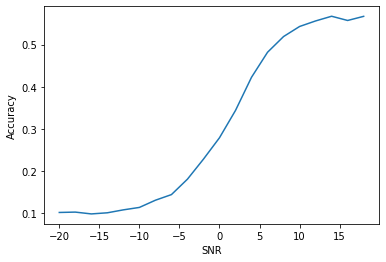

In [ ]:
plt.plot(snrs, acc)
plt.xlabel("SNR")
plt.ylabel("Accuracy")

###Using the integral 

In [ ]:
decision_tree = tree.DecisionTreeClassifier().fit(X_train_int, Y_train_int[:,0])
val_acc = decision_tree.score(X_val_int, Y_val_int[:,0])
print("Validation accuracy: ", val_acc)

Validation accuracy:  0.31114285714285717


In [ ]:
test_acc = decision_tree.score(X_test_int, Y_test_int[:,0])
print("Test accuracy: ", test_acc)

Test accuracy:  0.31201944444444446


In [ ]:
acc = []
for snr in snrs:
  print("SNR ==> ", snr)
  X_test_snr = X_test_int[np.argwhere(Y_test_int[:,1] == str(snr))]
  X_test_snr = X_test_snr.reshape((X_test_snr.shape[0], X_test_snr.shape[2]))
  Y_test_snr = Y_test_int[np.argwhere(Y_test_int[:,1] == str(snr))]
  Y_test_snr = Y_test_snr.reshape((Y_test_snr.shape[0], Y_test_snr.shape[2]))
  print(decision_tree.score(X_test_snr, Y_test_snr[:,0]))

  y_pred =decision_tree.predict(X_test_snr)
  Y_test_snr = arange_output(Y_test_snr)
  Y_pred = np.zeros((y_pred.shape[0], 10))
  for i in range(y_pred.shape[0]):
    Y_pred[i][mods.index(y_pred[i])] = 1
  cm = confusion_matrix(Y_test_snr.argmax(axis=1), Y_pred.argmax(axis=1))
  print(cm)
  true_values = np.sum(np.diag(cm))
  accuracy = true_values / np.sum(cm)
  print("Accuracy: ", accuracy)
  acc.append(accuracy)
  print()
acc = np.array(acc)

SNR ==>  -20
0.1037741123846799
[[210 146 208 182 195 146 159 134 193 173]
 [197 184 219 199 194 164 157 159 180 149]
 [215 136 220 187 178 151 172 144 198 162]
 [229 140 222 197 193 169 172 152 199 155]
 [218 131 199 197 180 156 179 142 196 195]
 [187 151 204 189 202 174 157 149 218 161]
 [193 152 213 212 186 173 176 129 185 159]
 [183 154 188 197 184 196 177 152 217 164]
 [216 145 199 206 206 173 160 117 186 150]
 [235 168 196 198 181 178 168 136 176 177]]
Accuracy:  0.1037741123846799

SNR ==>  -18
0.09920371599203716
[[202 139 177 204 231 158 189 123 208 163]
 [245 170 190 221 176 167 165 139 188 147]
 [212 169 213 197 191 182 161 147 197 173]
 [225 161 198 189 189 190 165 139 208 154]
 [212 154 221 210 191 171 182 128 193 172]
 [203 162 194 193 196 156 167 138 207 181]
 [199 166 192 193 207 187 182 130 203 144]
 [232 159 193 174 175 176 176 137 208 174]
 [208 144 241 210 173 172 162 134 172 171]
 [237 156 193 170 175 170 181 111 222 182]]
Accuracy:  0.09920371599203716

SNR ==>  -

Text(0, 0.5, 'Accuracy')

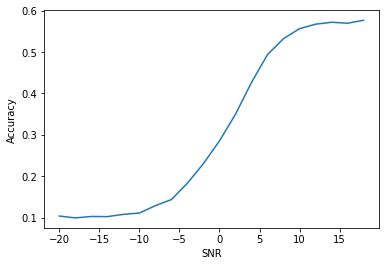

In [ ]:
plt.plot(snrs, acc)
plt.xlabel("SNR")
plt.ylabel("Accuracy")

###Using the raw, der combination

In [ ]:
decision_tree = tree.DecisionTreeClassifier().fit(X_train_raw_der, Y_train_raw_der[:,0])
val_acc = decision_tree.score(X_val_raw_der, Y_val_raw_der[:,0])
print("Validation accuracy: ", val_acc)

Validation accuracy:  0.31133333333333335


In [ ]:
test_acc = decision_tree.score(X_test_raw_der, Y_test_raw_der[:,0])
print("Test accuracy: ", test_acc)

Test accuracy:  0.31128055555555556


In [ ]:
acc = []
for snr in snrs:
  print("SNR ==> ", snr)
  X_test_snr = X_test_raw_der[np.argwhere(Y_test_raw_der[:,1] == str(snr))]
  X_test_snr = X_test_snr.reshape((X_test_snr.shape[0], X_test_snr.shape[2]))
  Y_test_snr = Y_test_raw_der[np.argwhere(Y_test_raw_der[:,1] == str(snr))]
  Y_test_snr = Y_test_snr.reshape((Y_test_snr.shape[0], Y_test_snr.shape[2]))
  print(decision_tree.score(X_test_snr, Y_test_snr[:,0]))

  y_pred =decision_tree.predict(X_test_snr)
  Y_test_snr = arange_output(Y_test_snr)
  Y_pred = np.zeros((y_pred.shape[0], 10))
  for i in range(y_pred.shape[0]):
    Y_pred[i][mods.index(y_pred[i])] = 1
  cm = confusion_matrix(Y_test_snr.argmax(axis=1), Y_pred.argmax(axis=1))
  print(cm)
  true_values = np.sum(np.diag(cm))
  accuracy = true_values / np.sum(cm)
  print("Accuracy: ", accuracy)
  acc.append(accuracy)
  print()
acc = np.array(acc)

SNR ==>  -20
0.10099163481247576
[[212 146 194 204 177 177 166 121 208 180]
 [188 151 220 207 188 174 192 129 201 178]
 [216 140 217 182 206 169 180 148 197 162]
 [206 144 211 190 237 168 176 140 194 162]
 [214 152 196 186 190 147 190 132 183 148]
 [203 171 209 197 206 166 160 152 201 153]
 [213 172 212 215 180 141 163 132 185 142]
 [241 163 171 195 201 166 164 144 234 174]
 [208 166 202 215 181 181 190 135 194 155]
 [203 154 186 201 213 174 137 131 207 196]]
Accuracy:  0.10099163481247576

SNR ==>  -18
0.10221102714805486
[[207 176 199 192 197 167 152 128 223 173]
 [212 176 209 180 192 169 147 143 219 180]
 [221 142 185 211 204 162 155 134 209 150]
 [225 130 221 226 205 185 176 124 205 156]
 [212 151 198 157 207 157 143 127 212 130]
 [201 163 200 202 189 176 169 135 205 150]
 [198 161 226 205 224 164 162 136 200 172]
 [236 178 208 190 177 157 156 124 224 144]
 [214 143 199 183 182 151 151 146 204 155]
 [200 178 186 189 178 169 137 129 219 159]]
Accuracy:  0.10221102714805486

SNR ==> 

Text(0, 0.5, 'Accuracy')

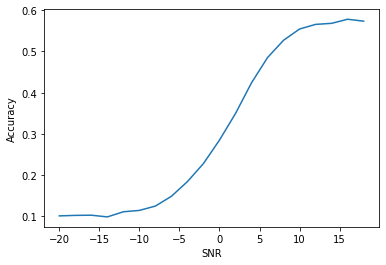

In [ ]:
plt.plot(snrs, acc)
plt.xlabel("SNR")
plt.ylabel("Accuracy")

###Using the raw, int combination

In [ ]:
decision_tree = tree.DecisionTreeClassifier().fit(X_train_raw_int, Y_train_raw_int[:,0])
val_acc = decision_tree.score(X_val_raw_int, Y_val_raw_int[:,0])
print("Validation accuracy: ", val_acc)

Validation accuracy:  0.30933333333333335


In [ ]:
test_acc = decision_tree.score(X_test_raw_int, Y_test_raw_int[:,0])
print("Test accuracy: ", test_acc)

Test accuracy:  0.308625


In [ ]:
acc = []
for snr in snrs:
  print("SNR ==> ", snr)
  X_test_snr = X_test_raw_int[np.argwhere(Y_test_raw_int[:,1] == str(snr))]
  X_test_snr = X_test_snr.reshape((X_test_snr.shape[0], X_test_snr.shape[2]))
  Y_test_snr = Y_test_raw_int[np.argwhere(Y_test_raw_int[:,1] == str(snr))]
  Y_test_snr = Y_test_snr.reshape((Y_test_snr.shape[0], Y_test_snr.shape[2]))
  print(decision_tree.score(X_test_snr, Y_test_snr[:,0]))

  y_pred = decision_tree.predict(X_test_snr)
  Y_test_snr = arange_output(Y_test_snr)
  Y_pred = np.zeros((y_pred.shape[0], 10))
  for i in range(y_pred.shape[0]):
    Y_pred[i][mods.index(y_pred[i])] = 1
  cm = confusion_matrix(Y_test_snr.argmax(axis=1), Y_pred.argmax(axis=1))
  print(cm)
  true_values = np.sum(np.diag(cm))
  accuracy = true_values / np.sum(cm)
  print("Accuracy: ", accuracy)
  acc.append(accuracy)
  print()
acc = np.array(acc)

SNR ==>  -20
0.10474035649246731
[[215 158 210 204 192 157 168 122 225 166]
 [210 161 195 206 225 156 152 146 210 168]
 [167 172 221 227 188 176 170 141 214 156]
 [233 147 209 216 186 182 151 159 214 165]
 [208 161 190 169 192 214 159 140 225 149]
 [226 140 187 193 176 167 187 136 209 153]
 [198 145 177 167 207 185 207 141 200 155]
 [221 151 215 196 203 149 175 143 183 160]
 [226 150 197 203 184 156 166 118 214 166]
 [223 176 210 205 183 171 172 129 211 162]]
Accuracy:  0.10474035649246731

SNR ==>  -18
0.09758113394677392
[[197 167 185 224 203 171 165 150 219 137]
 [228 156 201 180 193 181 142 135 219 162]
 [225 187 188 202 177 157 171 137 226 186]
 [227 168 210 199 199 168 144 148 219 160]
 [216 166 240 220 165 160 167 164 190 146]
 [219 175 207 216 162 160 171 146 207 135]
 [221 173 229 191 176 166 171 143 208 149]
 [196 141 215 207 194 143 167 159 224 158]
 [205 160 184 182 193 186 167 126 198 166]
 [218 175 189 186 183 143 172 146 216 178]]
Accuracy:  0.09758113394677392

SNR ==> 

Text(0, 0.5, 'Accuracy')

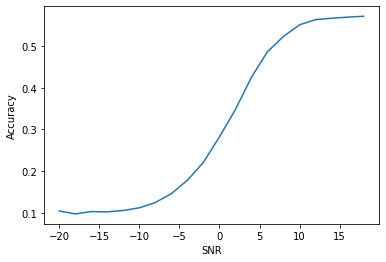

In [ ]:
plt.plot(snrs, acc)
plt.xlabel("SNR")
plt.ylabel("Accuracy")

###Using the der, int combination

In [ ]:
decision_tree = tree.DecisionTreeClassifier().fit(X_train_der_int, Y_train_der_int[:,0])
val_acc = decision_tree.score(X_val_der_int, Y_val_der_int[:,0])
print("Validation accuracy: ", val_acc)

Validation accuracy:  0.31547619047619047


In [ ]:
test_acc = decision_tree.score(X_test_der_int, Y_test_der_int[:,0])
print("Test accuracy: ", test_acc)

Test accuracy:  0.3102138888888889


In [ ]:
acc = []
for snr in snrs:
  print("SNR ==> ", snr)
  X_test_snr = X_test_der_int[np.argwhere(Y_test_der_int[:,1] == str(snr))]
  X_test_snr = X_test_snr.reshape((X_test_snr.shape[0], X_test_snr.shape[2]))
  Y_test_snr = Y_test_der_int[np.argwhere(Y_test_der_int[:,1] == str(snr))]
  Y_test_snr = Y_test_snr.reshape((Y_test_snr.shape[0], Y_test_snr.shape[2]))
  print(decision_tree.score(X_test_snr, Y_test_snr[:,0]))

  y_pred =decision_tree.predict(X_test_snr)
  Y_test_snr = arange_output(Y_test_snr)
  Y_pred = np.zeros((y_pred.shape[0], 10))
  for i in range(y_pred.shape[0]):
    Y_pred[i][mods.index(y_pred[i])] = 1
  cm = confusion_matrix(Y_test_snr.argmax(axis=1), Y_pred.argmax(axis=1))
  print(cm)
  true_values = np.sum(np.diag(cm))
  accuracy = true_values / np.sum(cm)
  print("Accuracy: ", accuracy)
  acc.append(accuracy)
  print()
acc = np.array(acc)

SNR ==>  -20
0.09799344116502695
[[198 162 179 209 208 164 156 144 214 176]
 [199 157 201 191 181 146 162 144 184 171]
 [231 156 174 209 180 158 167 148 207 170]
 [215 166 195 215 196 155 142 144 230 164]
 [215 147 192 192 208 152 161 137 224 175]
 [205 171 176 194 181 169 156 132 238 159]
 [229 157 209 200 197 161 138 135 218 140]
 [227 163 177 191 200 183 189 138 188 156]
 [221 159 182 199 190 188 176 130 211 164]
 [208 180 199 199 195 160 171 127 229 155]]
Accuracy:  0.09799344116502695

SNR ==>  -18
0.09810337178349601
[[194 164 206 164 203 159 167 127 225 148]
 [218 195 199 207 197 149 157 139 184 171]
 [233 143 187 184 197 170 211 141 190 167]
 [225 153 198 180 183 188 190 143 200 157]
 [238 149 192 208 172 187 166 148 196 142]
 [213 145 210 208 177 161 152 132 193 138]
 [195 177 207 206 169 185 163 112 208 154]
 [239 158 179 214 221 170 158 147 190 136]
 [206 165 199 218 201 158 180 150 200 176]
 [227 175 213 212 184 162 174 153 181 170]]
Accuracy:  0.09810337178349601

SNR ==> 

Text(0, 0.5, 'Accuracy')

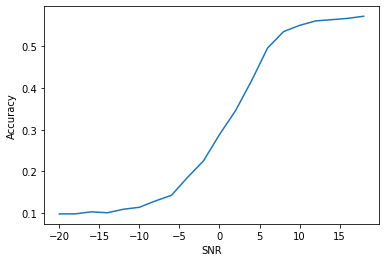

In [ ]:
plt.plot(snrs, acc)
plt.xlabel("SNR")
plt.ylabel("Accuracy")

###Using the raw, der and int combination

In [ ]:
decision_tree = tree.DecisionTreeClassifier().fit(X_train_raw_der_int, Y_train_raw_der_int[:,0])
val_acc = decision_tree.score(X_val_raw_der_int, Y_val_raw_der_int[:,0])
print("Validation accuracy: ", val_acc)

Validation accuracy:  0.30716666666666664


In [ ]:
test_acc = decision_tree.score(X_test_raw_der_int, Y_test_raw_der_int[:,0])
print("Test accuracy: ", test_acc)

Test accuracy:  0.31169444444444444


In [ ]:
acc = []
for snr in snrs:
  print("SNR ==> ", snr)
  X_test_snr = X_test_raw_der_int[np.argwhere(Y_test_raw_der_int[:,1] == str(snr))]
  X_test_snr = X_test_snr.reshape((X_test_snr.shape[0], X_test_snr.shape[2]))
  Y_test_snr = Y_test_raw_der_int[np.argwhere(Y_test_raw_der_int[:,1] == str(snr))]
  Y_test_snr = Y_test_snr.reshape((Y_test_snr.shape[0], Y_test_snr.shape[2]))
  print(decision_tree.score(X_test_snr, Y_test_snr[:,0]))

  y_pred =decision_tree.predict(X_test_snr)
  Y_test_snr = arange_output(Y_test_snr)
  Y_pred = np.zeros((y_pred.shape[0], 10))
  for i in range(y_pred.shape[0]):
    Y_pred[i][mods.index(y_pred[i])] = 1
  cm = confusion_matrix(Y_test_snr.argmax(axis=1), Y_pred.argmax(axis=1))
  print(cm)
  true_values = np.sum(np.diag(cm))
  accuracy = true_values / np.sum(cm)
  print("Accuracy: ", accuracy)
  acc.append(accuracy)
  print()
acc = np.array(acc)

SNR ==>  -20
0.0975691910402515
[[180 170 191 175 181 177 149 120 183 171]
 [226 144 194 192 211 188 154 112 195 195]
 [215 139 199 211 208 146 164 135 177 148]
 [203 157 209 188 178 164 191 141 226 165]
 [231 150 198 212 202 169 158 147 214 161]
 [244 164 196 184 194 190 168 126 201 169]
 [233 145 197 182 209 179 146 139 197 148]
 [233 162 206 187 185 190 176 123 201 156]
 [209 146 194 180 212 171 150 122 218 154]
 [224 157 184 190 200 158 153 119 180 148]]
Accuracy:  0.0975691910402515

SNR ==>  -18
0.10145007443347852
[[234 175 211 180 185 166 172 136 186 192]
 [205 174 201 193 192 161 169 128 227 153]
 [209 167 191 214 207 158 185 132 216 158]
 [248 136 188 214 166 157 153 141 189 172]
 [191 172 211 200 184 170 157 135 202 179]
 [209 161 168 202 212 158 171 150 235 171]
 [197 144 199 214 207 201 183 151 216 172]
 [193 168 199 198 191 197 160 150 213 137]
 [224 143 202 204 195 161 160 160 199 140]
 [194 165 209 208 178 171 179 128 195 153]]
Accuracy:  0.10145007443347852

SNR ==>  -

Text(0, 0.5, 'Accuracy')

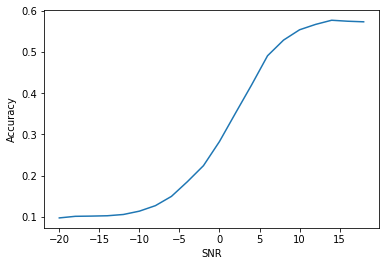

In [ ]:
plt.plot(snrs, acc)
plt.xlabel("SNR")
plt.ylabel("Accuracy")

# 3) Random Forest

###Raw data

In [ ]:
random_forest = RandomForestClassifier().fit(X_train, Y_train[:,0])
val_acc = random_forest.score(X_val, Y_val[:,0])
print("Validation accuracy: ", val_acc)

Validation accuracy:  0.43647619047619046


In [ ]:
test_acc = random_forest.score(X_test, Y_test[:,0])
print("Test accuracy: ", test_acc)

Test accuracy:  0.43898611111111113


In [ ]:
acc = []
for snr in snrs:
  print("SNR ==> ", snr)
  X_test_snr = X_test[np.argwhere(Y_test[:,1] == str(snr))]
  X_test_snr = X_test_snr.reshape((X_test_snr.shape[0], X_test_snr.shape[2]))
  Y_test_snr = Y_test[np.argwhere(Y_test[:,1] == str(snr))]
  Y_test_snr = Y_test_snr.reshape((Y_test_snr.shape[0], Y_test_snr.shape[2]))
  print(random_forest.score(X_test_snr, Y_test_snr[:,0]))

  y_pred = random_forest.predict(X_test_snr)
  Y_test_snr = arange_output(Y_test_snr)
  Y_pred = np.zeros((y_pred.shape[0], 10))
  for i in range(y_pred.shape[0]):
    Y_pred[i][mods.index(y_pred[i])] = 1
  cm = confusion_matrix(Y_test_snr.argmax(axis=1), Y_pred.argmax(axis=1))
  print(cm)
  true_values = np.sum(np.diag(cm))
  accuracy = true_values / np.sum(cm)
  print("Accuracy: ", accuracy)
  acc.append(accuracy)
  print()
acc = np.array(acc)

SNR ==>  -20
0.10366125083463165
[[435  82 262 247 169  97 131  42 284  57]
 [453  82 238 237 159 107 124  46 278  70]
 [443  72 281 236 165  85 137  57 282  54]
 [435  76 288 230 161 106 120  46 256  47]
 [455  75 268 242 182  95 105  56 285  57]
 [438  76 265 232 171 103 129  52 326  54]
 [433  70 276 223 163  89 139  42 296  69]
 [426  75 272 260 128  93 126  52 285  50]
 [425  56 259 218 157 107 116  47 303  60]
 [434  84 294 246 159 100 104  45 292  56]]
Accuracy:  0.10366125083463165

SNR ==>  -18
0.10014473391226898
[[449  70 280 252 165  96 123  41 306  57]
 [481  78 240 241 138 107 115  51 276  70]
 [418  79 253 241 165 106 113  39 331  65]
 [454  65 288 218 152 107 115  39 304  66]
 [450  65 291 256 161  79 117  45 284  53]
 [448  77 281 236 160  88 117  52 330  54]
 [414  68 269 223 151  91 110  67 291  62]
 [430  64 256 231 160 117 115  74 252  46]
 [431  73 264 252 152  90 142  30 277  57]
 [431  79 224 234 147 100 134  50 317  91]]
Accuracy:  0.10014473391226898

SNR ==> 

Text(0, 0.5, 'Accuracy')

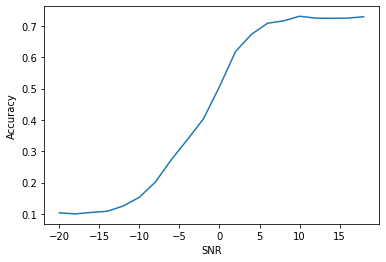

In [ ]:
plt.plot(snrs, acc)
plt.xlabel("SNR")
plt.ylabel("Accuracy")

###Using the derivative

In [ ]:
random_forest = RandomForestClassifier().fit(X_train_der, Y_train_der[:,0])
val_acc = random_forest.score(X_val_der, Y_val_der[:,0])
print("Validation accuracy: ", val_acc)

Validation accuracy:  0.44166666666666665


In [ ]:
test_acc = random_forest.score(X_test_der, Y_test_der[:,0])
print("Test accuracy: ", test_acc)

Test accuracy:  0.4402861111111111


In [ ]:
acc = []
for snr in snrs:
  print("SNR ==> ", snr)
  X_test_snr = X_test_der[np.argwhere(Y_test_der[:,1] == str(snr))]
  X_test_snr = X_test_snr.reshape((X_test_snr.shape[0], X_test_snr.shape[2]))
  Y_test_snr = Y_test_der[np.argwhere(Y_test_der[:,1] == str(snr))]
  Y_test_snr = Y_test_snr.reshape((Y_test_snr.shape[0], Y_test_snr.shape[2]))
  print(random_forest.score(X_test_snr, Y_test_snr[:,0]))

  y_pred = random_forest.predict(X_test_snr)
  Y_test_snr = arange_output(Y_test_snr)
  Y_pred = np.zeros((y_pred.shape[0], 10))
  for i in range(y_pred.shape[0]):
    Y_pred[i][mods.index(y_pred[i])] = 1
  cm = confusion_matrix(Y_test_snr.argmax(axis=1), Y_pred.argmax(axis=1))
  print(cm)
  true_values = np.sum(np.diag(cm))
  accuracy = true_values / np.sum(cm)
  print("Accuracy: ", accuracy)
  acc.append(accuracy)
  print()
acc = np.array(acc)

SNR ==>  -20
0.10359640909841934
[[456  69 286 217 175  95 132  41 327  52]
 [474  82 273 254 149  90 103  34 309  75]
 [454  84 287 225 148  94 129  41 335  59]
 [447  73 254 246 165 111 127  59 278  47]
 [439  50 288 223 177 114 136  40 279  57]
 [463  60 268 233 164 106 123  37 297  61]
 [447  62 233 285 184  90 129  33 278  50]
 [474  71 232 240 156  99 129  36 278  56]
 [458  59 255 252 153 112 107  49 292  67]
 [426  76 238 254 171  86 137  45 317  70]]
Accuracy:  0.10359640909841934

SNR ==>  -18
0.10510794569330069
[[406  67 252 235 144 100 118  47 296  50]
 [421 111 247 246 164  94  93  47 276  71]
 [443  73 273 228 165  78 120  52 263  53]
 [507  80 276 240 149  85 121  50 289  49]
 [475  78 265 224 144  84 100  38 285  67]
 [448  75 260 253 158 107 129  51 319  58]
 [438  76 252 232 163  89 150  38 291  59]
 [440  55 256 241 168 109 121  46 306  48]
 [455  77 245 217 154 112 137  53 335  60]
 [492  90 232 245 146 104 122  44 300  77]]
Accuracy:  0.10510794569330069

SNR ==> 

Text(0, 0.5, 'Accuracy')

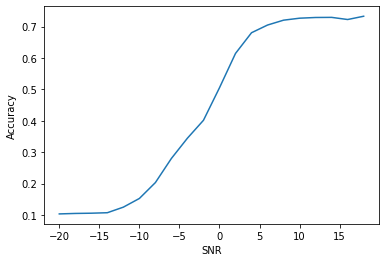

In [ ]:
plt.plot(snrs, acc)
plt.xlabel("SNR")
plt.ylabel("Accuracy")

###Using the integral

In [ ]:
random_forest = RandomForestClassifier().fit(X_train_int, Y_train_int[:,0])
val_acc = random_forest.score(X_val_int, Y_val_int[:,0])
print("Validation accuracy: ", val_acc)

Validation accuracy:  0.4256904761904762


In [ ]:
test_acc = random_forest.score(X_test_int, Y_test_int[:,0])
print("Test accuracy: ", test_acc)

Test accuracy:  0.4287361111111111


In [ ]:
acc = []
for snr in snrs:
  print("SNR ==> ", snr)
  X_test_snr = X_test_int[np.argwhere(Y_test_int[:,1] == str(snr))]
  X_test_snr = X_test_snr.reshape((X_test_snr.shape[0], X_test_snr.shape[2]))
  Y_test_snr = Y_test_int[np.argwhere(Y_test_int[:,1] == str(snr))]
  Y_test_snr = Y_test_snr.reshape((Y_test_snr.shape[0], Y_test_snr.shape[2]))
  print(random_forest.score(X_test_snr, Y_test_snr[:,0]))

  y_pred = random_forest.predict(X_test_snr)
  Y_test_snr = arange_output(Y_test_snr)
  Y_pred = np.zeros((y_pred.shape[0], 10))
  for i in range(y_pred.shape[0]):
    Y_pred[i][mods.index(y_pred[i])] = 1
  cm = confusion_matrix(Y_test_snr.argmax(axis=1), Y_pred.argmax(axis=1))
  print(cm)
  true_values = np.sum(np.diag(cm))
  accuracy = true_values / np.sum(cm)
  print("Accuracy: ", accuracy)
  acc.append(accuracy)
  print()
acc = np.array(acc)

SNR ==>  -20
0.10213473800942612
[[432  71 283 218 168  84 116  39 295  57]
 [433  84 250 217 163 114 126  60 278  69]
 [434  67 294 241 177 108 120  52 306  41]
 [440  75 270 237 157 100 108  45 288  51]
 [409  66 260 256 174 112 122  44 306  54]
 [476  82 268 216 166 111 125  44 281  55]
 [416  63 293 239 172  93 109  40 287  60]
 [456  66 274 267 162  98 113  44 300  57]
 [498  67 253 227 143 110 126  39 294  55]
 [465  67 233 239 152 112 128  51 309  63]]
Accuracy:  0.10213473800942612

SNR ==>  -18
0.10275689223057644
[[470  71 261 242 163 112 123  57 291  50]
 [426  88 280 231 135 110 115  48 326  63]
 [473  84 260 221 124  93 135  62 295  48]
 [415  78 234 234 139 125 136  52 292  51]
 [488  67 274 209 141 100 119  60 282  56]
 [441  65 298 243 150  97  85  51 302  65]
 [418  80 265 223 135 116 135  47 275  57]
 [472  55 245 234 175 114 129  75 290  44]
 [441  69 245 251 155 118 105  45 291  53]
 [439  72 274 199 154  99 139  49 313  54]]
Accuracy:  0.10275689223057644

SNR ==> 

Text(0, 0.5, 'Accuracy')

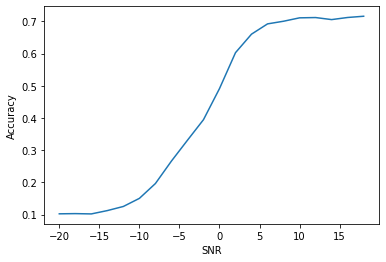

In [ ]:
plt.plot(snrs, acc)
plt.xlabel("SNR")
plt.ylabel("Accuracy")

###Using the raw, der combination

In [ ]:
random_forest = RandomForestClassifier().fit(X_train_raw_der, Y_train_raw_der[:,0])
val_acc = random_forest.score(X_val_raw_der, Y_val_raw_der[:,0])
print("Validation accuracy: ", val_acc)

Validation accuracy:  0.44276190476190475


In [ ]:
test_acc = random_forest.score(X_test_raw_der, Y_test_raw_der[:,0])
print("Test accuracy: ", test_acc)

Test accuracy:  0.4411111111111111


In [ ]:
acc = []
for snr in snrs:
  print("SNR ==> ", snr)
  X_test_snr = X_test_raw_der[np.argwhere(Y_test_raw_der[:,1] == str(snr))]
  X_test_snr = X_test_snr.reshape((X_test_snr.shape[0], X_test_snr.shape[2]))
  Y_test_snr = Y_test_raw_der[np.argwhere(Y_test_raw_der[:,1] == str(snr))]
  Y_test_snr = Y_test_snr.reshape((Y_test_snr.shape[0], Y_test_snr.shape[2]))
  print(random_forest.score(X_test_snr, Y_test_snr[:,0]))

  y_pred = random_forest.predict(X_test_snr)
  Y_test_snr = arange_output(Y_test_snr)
  Y_pred = np.zeros((y_pred.shape[0], 10))
  for i in range(y_pred.shape[0]):
    Y_pred[i][mods.index(y_pred[i])] = 1
  cm = confusion_matrix(Y_test_snr.argmax(axis=1), Y_pred.argmax(axis=1))
  print(cm)
  true_values = np.sum(np.diag(cm))
  accuracy = true_values / np.sum(cm)
  print("Accuracy: ", accuracy)
  acc.append(accuracy)
  print()
acc = np.array(acc)

SNR ==>  -20
0.09878808094285078
[[415  72 257 272 160  96 131  29 311  72]
 [442  92 294 234 191  82  89  35 298  62]
 [448  80 269 230 187 107 115  44 302  65]
 [473  61 279 242 165 116  97  49 266  56]
 [429  83 254 250 155 103 123  55 311  61]
 [447  89 295 239 158  91 109  51 288  52]
 [438  74 254 245 162  93 126  41 291  54]
 [425  81 275 242 138 103 129  41 301  56]
 [426  81 279 236 156 108  97  39 285  62]
 [443  82 257 224 141  91 107  33 283  61]]
Accuracy:  0.09878808094285078

SNR ==>  -18
0.10331590074552131
[[439  68 284 250 162  90 128  47 258  48]
 [426 100 275 249 158  98 104  36 306  87]
 [448  77 281 249 172  91  91  55 319  61]
 [453  78 282 224 170  97 103  31 296  60]
 [426  80 272 237 150 105 113  50 285  59]
 [411  77 271 232 147 114 125  55 267  49]
 [457  90 270 224 153  87 126  37 296  57]
 [446  63 267 217 148  90 124  69 287  49]
 [419  86 286 239 176 106 103  44 279  48]
 [445  88 268 255 175  86 121  47 295  75]]
Accuracy:  0.10331590074552131

SNR ==> 

Text(0, 0.5, 'Accuracy')

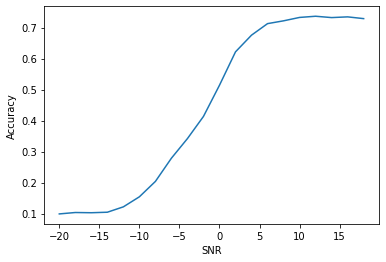

In [ ]:
plt.plot(snrs, acc)
plt.xlabel("SNR")
plt.ylabel("Accuracy")

###Using the raw, int combination

In [ ]:
random_forest = RandomForestClassifier().fit(X_train_raw_int, Y_train_raw_int[:,0])
val_acc = random_forest.score(X_val_raw_int, Y_val_raw_int[:,0])
print("Validation accuracy: ", val_acc)

Validation accuracy:  0.4417857142857143


In [ ]:
test_acc = random_forest.score(X_test_raw_int, Y_test_raw_int[:,0])
print("Test accuracy: ", test_acc)

Test accuracy:  0.44300833333333334


In [ ]:
acc = []
for snr in snrs:
  print("SNR ==> ", snr)
  X_test_snr = X_test_raw_int[np.argwhere(Y_test_raw_int[:,1] == str(snr))]
  X_test_snr = X_test_snr.reshape((X_test_snr.shape[0], X_test_snr.shape[2]))
  Y_test_snr = Y_test_raw_int[np.argwhere(Y_test_raw_int[:,1] == str(snr))]
  Y_test_snr = Y_test_snr.reshape((Y_test_snr.shape[0], Y_test_snr.shape[2]))
  print(random_forest.score(X_test_snr, Y_test_snr[:,0]))

  y_pred = random_forest.predict(X_test_snr)
  Y_test_snr = arange_output(Y_test_snr)
  Y_pred = np.zeros((y_pred.shape[0], 10))
  for i in range(y_pred.shape[0]):
    Y_pred[i][mods.index(y_pred[i])] = 1
  cm = confusion_matrix(Y_test_snr.argmax(axis=1), Y_pred.argmax(axis=1))
  print(cm)
  true_values = np.sum(np.diag(cm))
  accuracy = true_values / np.sum(cm)
  print("Accuracy: ", accuracy)
  acc.append(accuracy)
  print()
acc = np.array(acc)

SNR ==>  -20
0.09986735934563944
[[410  86 270 274 164  88 133  42 292  41]
 [458  78 271 264 162  82 103  41 247  69]
 [430  79 291 217 162 101 114  45 266  51]
 [426  64 273 238 161  87 100  49 314  60]
 [446  76 281 234 163  97 147  45 290  53]
 [471  87 277 271 147  95 110  49 308  56]
 [453  65 296 239 152  96 118  41 308  48]
 [420  79 275 275 144 108 135  32 298  49]
 [446  82 304 230 154  98 112  51 317  51]
 [414  81 305 247 147  94 116  47 296  65]]
Accuracy:  0.09986735934563944

SNR ==>  -18
0.10212931561683437
[[442  66 321 227 156 105 120  34 291  55]
 [454 110 269 227 170  96 105  51 301  82]
 [468  90 255 259 147  85 119  34 298  64]
 [442  72 277 246 185  90 120  45 298  53]
 [416  80 279 214 171  83 121  33 335  50]
 [466  69 279 252 175  77 121  45 284  60]
 [443  78 251 214 159  86 131  30 303  45]
 [426  62 275 241 151 110 118  42 305  55]
 [459  80 271 215 157  93 108  40 282  55]
 [437  95 255 223 148  96 102  44 282  81]]
Accuracy:  0.10212931561683437

SNR ==> 

Text(0, 0.5, 'Accuracy')

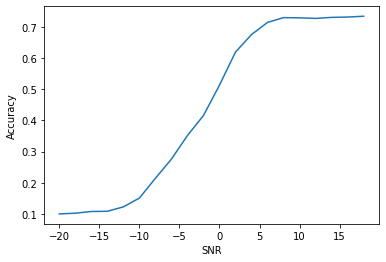

In [ ]:
plt.plot(snrs, acc)
plt.xlabel("SNR")
plt.ylabel("Accuracy")

###Using the der, int combination

In [ ]:
random_forest = RandomForestClassifier().fit(X_train_der_int, Y_train_der_int[:,0])
val_acc = random_forest.score(X_val_der_int, Y_val_der_int[:,0])
print("Validation accuracy: ", val_acc)

Validation accuracy:  0.44145238095238093


In [ ]:
test_acc = random_forest.score(X_test_der_int, Y_test_der_int[:,0])
print("Test accuracy: ", test_acc)

Test accuracy:  0.4412138888888889


In [ ]:
acc = []
for snr in snrs:
  print("SNR ==> ", snr)
  X_test_snr = X_test_der_int[np.argwhere(Y_test_der_int[:,1] == str(snr))]
  X_test_snr = X_test_snr.reshape((X_test_snr.shape[0], X_test_snr.shape[2]))
  Y_test_snr = Y_test_der_int[np.argwhere(Y_test_der_int[:,1] == str(snr))]
  Y_test_snr = Y_test_snr.reshape((Y_test_snr.shape[0], Y_test_snr.shape[2]))
  print(random_forest.score(X_test_snr, Y_test_snr[:,0]))

  y_pred = random_forest.predict(X_test_snr)
  Y_test_snr = arange_output(Y_test_snr)
  Y_pred = np.zeros((y_pred.shape[0], 10))
  for i in range(y_pred.shape[0]):
    Y_pred[i][mods.index(y_pred[i])] = 1
  cm = confusion_matrix(Y_test_snr.argmax(axis=1), Y_pred.argmax(axis=1))
  print(cm)
  true_values = np.sum(np.diag(cm))
  accuracy = true_values / np.sum(cm)
  print("Accuracy: ", accuracy)
  acc.append(accuracy)
  print()
acc = np.array(acc)

SNR ==>  -20
0.10266117358868723
[[451  83 269 250 168  95 110  38 313  55]
 [439  78 245 268 171  96 115  42 293  67]
 [425  75 264 245 147 101 114  41 317  61]
 [436  66 260 231 164  99 105  37 305  54]
 [422  68 288 239 170  98 111  32 287  59]
 [460  73 286 236 151  77 100  48 277  60]
 [442  56 284 235 177 106 134  42 271  54]
 [459  81 286 223 160 113 126  61 269  51]
 [441  68 233 261 171  80 111  43 309  64]
 [457  87 266 234 139 122 116  33 293  69]]
Accuracy:  0.10266117358868723

SNR ==>  -18
0.10084456625090889
[[445  80 264 245 157  75  94  31 271  61]
 [445  97 262 243 146 107 117  51 307  74]
 [476  63 252 247 156 104 120  35 330  56]
 [441  73 252 253 170  82 116  36 294  44]
 [455  67 268 242 148  95  99  42 324  47]
 [443  81 268 273 164  86 115  41 256  52]
 [452  64 283 251 147  97 132  38 290  62]
 [457  77 273 233 159  88 121  51 308  62]
 [485  66 281 219 130 101  95  44 272  69]
 [438  77 277 231 133  84 100  34 293  67]]
Accuracy:  0.10084456625090889

SNR ==> 

Text(0, 0.5, 'Accuracy')

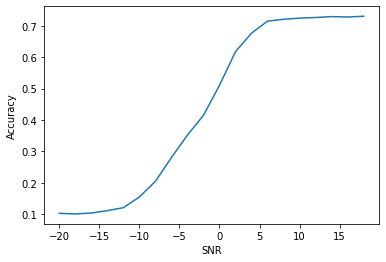

In [ ]:
plt.plot(snrs, acc)
plt.xlabel("SNR")
plt.ylabel("Accuracy")

###Using the raw, der and int combination

In [ ]:
random_forest = RandomForestClassifier().fit(X_train_raw_der_int, Y_train_raw_der_int[:,0])
val_acc = random_forest.score(X_val_raw_der_int, Y_val_raw_der_int[:,0])
print("Validation accuracy: ", val_acc)

Validation accuracy:  0.44597619047619047


In [ ]:
test_acc = random_forest.score(X_test_raw_der_int, Y_test_raw_der_int[:,0])
print("Test accuracy: ", test_acc)

Test accuracy:  0.44514166666666666


In [ ]:
acc = []
for snr in snrs:
  print("SNR ==> ", snr)
  X_test_snr = X_test_raw_der_int[np.argwhere(Y_test_raw_der_int[:,1] == str(snr))]
  X_test_snr = X_test_snr.reshape((X_test_snr.shape[0], X_test_snr.shape[2]))
  Y_test_snr = Y_test_raw_der_int[np.argwhere(Y_test_raw_der_int[:,1] == str(snr))]
  Y_test_snr = Y_test_snr.reshape((Y_test_snr.shape[0], Y_test_snr.shape[2]))
  print(random_forest.score(X_test_snr, Y_test_snr[:,0]))

  y_pred = random_forest.predict(X_test_snr)
  Y_test_snr = arange_output(Y_test_snr)
  Y_pred = np.zeros((y_pred.shape[0], 10))
  for i in range(y_pred.shape[0]):
    Y_pred[i][mods.index(y_pred[i])] = 1
  cm = confusion_matrix(Y_test_snr.argmax(axis=1), Y_pred.argmax(axis=1))
  print(cm)
  true_values = np.sum(np.diag(cm))
  accuracy = true_values / np.sum(cm)
  print("Accuracy: ", accuracy)
  acc.append(accuracy)
  print()
acc = np.array(acc)

SNR ==>  -20
0.0995608427372283
[[408  83 274 250 163  95 103  42 274  54]
 [441 104 284 220 173 106  88  40 329  66]
 [445  85 274 248 180  78 123  42 250  48]
 [441  64 306 240 164  84 103  37 273  60]
 [418  68 303 259 168  97 119  39 293  63]
 [455  69 259 239 162  81 112  46 304  55]
 [419  80 282 266 158 108 121  35 276  48]
 [432  70 269 247 163 100 109  42 291  63]
 [429  78 273 240 186  78 114  48 275  62]
 [467  98 262 274 182  87 108  41 279  78]]
Accuracy:  0.0995608427372283

SNR ==>  -18
0.10238812632518692
[[427  75 229 257 166  93 128  48 288  73]
 [422  90 277 220 164  95 105  36 247  61]
 [437  79 305 250 156 103 106  49 278  64]
 [439  73 268 222 191  93 107  41 260  62]
 [433  71 280 222 169 114 112  47 310  56]
 [440  64 269 240 171  99  98  51 258  58]
 [453  61 253 251 164  91 111  49 302  42]
 [453  70 291 234 182 105 111  38 285  53]
 [416  73 269 239 178 102 120  29 296  64]
 [471 113 280 236 169 116 115  43 270  78]]
Accuracy:  0.10238812632518692

SNR ==>  -

Text(0, 0.5, 'Accuracy')

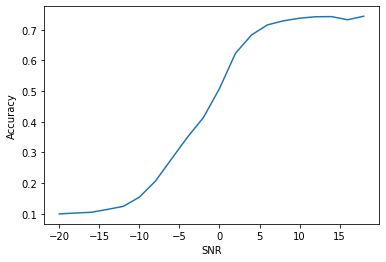

In [ ]:
plt.plot(snrs, acc)
plt.xlabel("SNR")
plt.ylabel("Accuracy")

# 4) Fully connected dense layer

In [ ]:
#fully connected dense layer
def getFullyConnectedLayerModel(input_shape):
  model = Sequential([
          Dense(128, activation='relu',input_shape=input_shape),
          Flatten(),
          Dense(10, activation='softmax')
      ])
  model.compile(
      optimizer='adam', 
      loss='categorical_crossentropy', 
      metrics=['accuracy']
  )
  # print(model.summary())
  return model

###Raw data

In [ ]:
fully_connected_model = getFullyConnectedLayerModel((2,128))
X_train, Y_t, X_val, Y_v, X_test, Y_ts = split_data(X, labels)
Y_train = arange_output(Y_t)
Y_val = arange_output(Y_v)
Y_test = arange_output(Y_ts)
early_stopping = EarlyStopping()
fully_connected_model.fit(X_train, Y_train, batch_size=1024, epochs=100, validation_data=(X_val, Y_val), callbacks=[early_stopping])

Epoch 1/100
780/780 [==============================] - 3s 3ms/step - loss: 2.1482 - accuracy: 0.1883 - val_loss: 1.8911 - val_accuracy: 0.2792
Epoch 2/100
780/780 [==============================] - 3s 3ms/step - loss: 1.8486 - accuracy: 0.2877 - val_loss: 1.7758 - val_accuracy: 0.3067
Epoch 3/100
780/780 [==============================] - 3s 4ms/step - loss: 1.7630 - accuracy: 0.3117 - val_loss: 1.7419 - val_accuracy: 0.3174
Epoch 4/100
780/780 [==============================] - 3s 4ms/step - loss: 1.7349 - accuracy: 0.3227 - val_loss: 1.7223 - val_accuracy: 0.3292
Epoch 5/100
780/780 [==============================] - 3s 4ms/step - loss: 1.7169 - accuracy: 0.3301 - val_loss: 1.7089 - val_accuracy: 0.3354
Epoch 6/100
780/780 [==============================] - 3s 4ms/step - loss: 1.7026 - accuracy: 0.3392 - val_loss: 1.6964 - val_accuracy: 0.3445
Epoch 7/100
780/780 [==============================] - 3s 3ms/step - loss: 1.6902 - accuracy: 0.3472 - val_loss: 1.6858 - val_accuracy: 0.3454

In [ ]:
fully_connected_model.evaluate(X_test, Y_test, batch_size=1024)

352/352 [==============================] - 1s 3ms/step - loss: 1.5703 - accuracy: 0.3816


[1.5703206062316895, 0.3815527856349945]

In [ ]:
acc = []
for snr in snrs:
  print("SNR ==> ", snr)
  X_test_snr = X_test[np.argwhere(Y_ts[:,1] == str(snr))]
  X_test_snr = X_test_snr.reshape((X_test_snr.shape[0], 2, 128))
  Y_test_snr = Y_test[np.argwhere(Y_ts[:,1] == str(snr))]
  Y_test_snr = Y_test_snr.reshape(Y_test_snr.shape[0], 10)
  fully_connected_model.evaluate(X_test_snr, Y_test_snr)

  y_pred = fully_connected_model.predict(X_test_snr)
  cm = confusion_matrix(Y_test_snr.argmax(axis=1), y_pred.argmax(axis=1))
  print(cm)
  true_values = np.sum(np.diag(cm))
  accuracy = true_values / np.sum(cm)
  print("Accuracy: ", accuracy)
  acc.append(accuracy)
  print()
acc = np.array(acc)

SNR ==>  -20
563/563 [==============================] - 1s 2ms/step - loss: 2.4755 - accuracy: 0.1045
[[ 84 276 498 120 414  77   1   0 134 153]
 [ 76 313 488 132 414  72   1   0 102 164]
 [ 74 287 550 160 401  85   2   0 133 143]
 [ 90 248 497 144 397  65   7   0 142 147]
 [108 306 480 169 395  65   1   0 144 149]
 [ 99 271 475 161 416  93   2   0 132 131]
 [101 283 504 143 412  89   2   0 144 147]
 [122 230 464 178 373  79   0   0 196 161]
 [101 290 494 159 441  84   2   0 114 158]
 [ 80 329 464 138 390  91   0   0 150 185]]
Accuracy:  0.10452574224396753

SNR ==>  -18
564/564 [==============================] - 1s 2ms/step - loss: 2.4512 - accuracy: 0.1052
[[ 82 285 511 125 414  92   1   0 127 169]
 [ 81 342 494 117 376  68   2   0 127 197]
 [113 271 505 154 394  74   1   1 127 149]
 [ 80 287 490 150 424  80   1   0 146 160]
 [ 96 273 449 160 430  70   0   0 132 143]
 [ 96 279 520 170 435  72   0   0 149 146]
 [103 245 501 198 370  85   2   0 178 146]
 [168 182 451 279 331  89   7   

Text(0, 0.5, 'Accuracy')

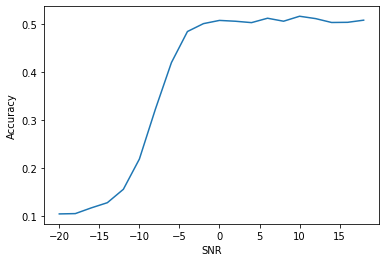

In [ ]:
plt.plot(snrs, acc)
plt.xlabel("SNR")
plt.ylabel("Accuracy")

###Using the derivative

In [ ]:
fully_connected_model_deriv = getFullyConnectedLayerModel((2,128))
X_train_der, Y_t_der, X_val_der, Y_v_der, X_test_der, Y_ts_der = split_data(X_deriv, labels)
Y_train_der = arange_output(Y_t_der)
Y_val_der = arange_output(Y_v_der)
Y_test_der = arange_output(Y_ts_der)
early_stopping = EarlyStopping()
fully_connected_model_deriv.fit(X_train_der, Y_train_der, batch_size=1024, epochs=100, validation_data=(X_val_der, Y_val_der), callbacks=[early_stopping])

Epoch 1/100
780/780 [==============================] - 5s 4ms/step - loss: 1.9166 - accuracy: 0.2658 - val_loss: 1.7113 - val_accuracy: 0.3449
Epoch 2/100
780/780 [==============================] - 3s 3ms/step - loss: 1.6973 - accuracy: 0.3503 - val_loss: 1.6791 - val_accuracy: 0.3590
Epoch 3/100
780/780 [==============================] - 3s 4ms/step - loss: 1.6653 - accuracy: 0.3626 - val_loss: 1.6568 - val_accuracy: 0.3611
Epoch 4/100
780/780 [==============================] - 3s 3ms/step - loss: 1.6402 - accuracy: 0.3692 - val_loss: 1.6392 - val_accuracy: 0.3651
Epoch 5/100
780/780 [==============================] - 3s 4ms/step - loss: 1.6216 - accuracy: 0.3747 - val_loss: 1.6248 - val_accuracy: 0.3710
Epoch 6/100
780/780 [==============================] - 3s 3ms/step - loss: 1.6003 - accuracy: 0.3831 - val_loss: 1.6112 - val_accuracy: 0.3795
Epoch 7/100
780/780 [==============================] - 3s 3ms/step - loss: 1.5907 - accuracy: 0.3870 - val_loss: 1.6025 - val_accuracy: 0.3835

In [ ]:
fully_connected_model_deriv.evaluate(X_test_der, Y_test_der, batch_size=1024)

352/352 [==============================] - 1s 3ms/step - loss: 1.4989 - accuracy: 0.4122


[1.4988536834716797, 0.4122388958930969]

In [ ]:
acc = []
for snr in snrs:
  print("SNR ==> ", snr)
  X_test_snr = X_test_der[np.argwhere(Y_ts_der[:,1] == str(snr))]
  X_test_snr = X_test_snr.reshape((X_test_snr.shape[0], 2, 128))
  Y_test_snr = Y_test_der[np.argwhere(Y_ts_der[:,1] == str(snr))]
  Y_test_snr = Y_test_snr.reshape(Y_test_snr.shape[0], 10)
  fully_connected_model_deriv.evaluate(X_test_snr, Y_test_snr)

  y_pred = fully_connected_model_deriv.predict(X_test_snr)
  cm = confusion_matrix(Y_test_snr.argmax(axis=1), y_pred.argmax(axis=1))
  print(cm)
  true_values = np.sum(np.diag(cm))
  accuracy = true_values / np.sum(cm)
  print("Accuracy: ", accuracy)
  acc.append(accuracy)
  print()
acc = np.array(acc)

SNR ==>  -20
568/568 [==============================] - 1s 2ms/step - loss: 2.5384 - accuracy: 0.1042
[[ 71 221 297 254 315 163  51   0 222 203]
 [ 84 290 281 256 276 164  46   0 196 204]
 [ 86 235 300 270 307 170  41   1 201 203]
 [ 93 220 314 248 292 199  44   0 214 195]
 [ 84 224 300 271 299 174  50   0 216 211]
 [ 87 217 283 301 316 175  53   0 222 180]
 [104 211 295 285 309 205  51   0 235 178]
 [110 158 276 323 264 179  58   0 256 182]
 [ 77 205 307 236 270 181  44   0 230 219]
 [ 75 273 293 264 272 167  39   0 219 229]]
Accuracy:  0.10418845285926578

SNR ==>  -18
567/567 [==============================] - 1s 2ms/step - loss: 2.5091 - accuracy: 0.1099
[[ 93 221 292 262 287 189  45   0 208 202]
 [ 85 308 264 272 273 146  40   0 203 254]
 [ 85 203 303 285 290 175  45   0 209 196]
 [ 84 218 309 271 280 172  43   0 232 193]
 [100 221 271 281 302 177  43   0 226 189]
 [ 97 226 273 281 274 193  41   1 226 183]
 [108 200 294 281 284 199  62   0 257 182]
 [109 128 259 350 224 194 108   

Text(0, 0.5, 'Accuracy')

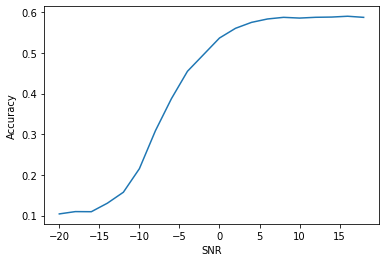

In [ ]:
plt.plot(snrs, acc)
plt.xlabel("SNR")
plt.ylabel("Accuracy")

###Using the integral

In [ ]:
fully_connected_model_integ = getFullyConnectedLayerModel((2,129))
X_train_int, Y_t_int, X_val_int, Y_v_int, X_test_int, Y_ts_int = split_data(X_integ, labels)
Y_train_int = arange_output(Y_t_int)
Y_val_int = arange_output(Y_v_int)
Y_test_int = arange_output(Y_ts_int)
early_stopping = EarlyStopping()
fully_connected_model_integ.fit(X_train_int, Y_train_int, batch_size=1024, epochs=100, validation_data=(X_val_int, Y_val_int), callbacks=[early_stopping])

Epoch 1/100
780/780 [==============================] - 3s 3ms/step - loss: 2.2788 - accuracy: 0.1361 - val_loss: 2.1869 - val_accuracy: 0.1595
Epoch 2/100
780/780 [==============================] - 2s 3ms/step - loss: 2.1685 - accuracy: 0.1694 - val_loss: 2.1287 - val_accuracy: 0.1857
Epoch 3/100
780/780 [==============================] - 2s 3ms/step - loss: 2.1156 - accuracy: 0.1872 - val_loss: 2.0918 - val_accuracy: 0.1937
Epoch 4/100
780/780 [==============================] - 2s 3ms/step - loss: 2.0791 - accuracy: 0.1962 - val_loss: 2.0645 - val_accuracy: 0.2033
Epoch 5/100
780/780 [==============================] - 2s 3ms/step - loss: 2.0562 - accuracy: 0.2031 - val_loss: 2.0427 - val_accuracy: 0.2081
Epoch 6/100
780/780 [==============================] - 2s 3ms/step - loss: 2.0335 - accuracy: 0.2102 - val_loss: 2.0230 - val_accuracy: 0.2176
Epoch 7/100
780/780 [==============================] - 2s 3ms/step - loss: 2.0146 - accuracy: 0.2180 - val_loss: 2.0036 - val_accuracy: 0.2225

In [ ]:
fully_connected_model_integ.evaluate(X_test_int, Y_test_int, batch_size=1024)

352/352 [==============================] - 1s 2ms/step - loss: 1.7148 - accuracy: 0.3293


[1.7147668600082397, 0.3292694389820099]

In [ ]:
acc = []
for snr in snrs:
  print("SNR ==> ", snr)
  X_test_snr = X_test_int[np.argwhere(Y_ts_int[:,1] == str(snr))]
  X_test_snr = X_test_snr.reshape((X_test_snr.shape[0], 2, 129))
  Y_test_snr = Y_test_int[np.argwhere(Y_ts_int[:,1] == str(snr))]
  Y_test_snr = Y_test_snr.reshape(Y_test_snr.shape[0], 10)
  fully_connected_model_integ.evaluate(X_test_snr, Y_test_snr)

  y_pred = fully_connected_model_integ.predict(X_test_snr)
  cm = confusion_matrix(Y_test_snr.argmax(axis=1), y_pred.argmax(axis=1))
  print(cm)
  true_values = np.sum(np.diag(cm))
  accuracy = true_values / np.sum(cm)
  print("Accuracy: ", accuracy)
  acc.append(accuracy)
  print()
acc = np.array(acc)

SNR ==>  -20
560/560 [==============================] - 1s 2ms/step - loss: 2.4213 - accuracy: 0.1035
[[141 435 763 106 196  15   0   0  31 141]
 [131 457 697 106 155  15   0   0  20 170]
 [145 386 772 103 185  21   0   0  27 139]
 [120 400 801 104 204  18   0   0  17 124]
 [116 418 764 133 195  16   0   0  44 125]
 [142 398 695 124 216   8   0   0  30 126]
 [132 377 744 133 178  13   0   0  41 153]
 [138 352 768 152 203  15   0   0  43 140]
 [134 417 780 103 185  10   2   0  25 149]
 [116 454 712 133 201  18   1   0  30 150]]
Accuracy:  0.1034810303402805

SNR ==>  -18
561/561 [==============================] - 1s 2ms/step - loss: 2.4004 - accuracy: 0.1062
[[135 440 763 117 195  16   1   0  27 140]
 [102 457 647  99 172  14   0   0  27 211]
 [128 385 778 127 203  18   1   0  30 135]
 [123 388 780 113 217  23   1   0  24 150]
 [124 386 743 130 216  21   0   0  21 145]
 [134 374 796 116 190  12   2   0  28 140]
 [145 391 731 144 171  16   1   0  47 135]
 [171 285 741 165 223  24   0   0

Text(0, 0.5, 'Accuracy')

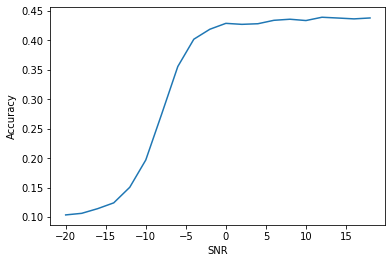

In [ ]:
plt.plot(snrs, acc)
plt.xlabel("SNR")
plt.ylabel("Accuracy")

### Using raw, derivative combination

In [ ]:
fully_connected_model_raw_der = getFullyConnectedLayerModel((4,128))
X_train_raw_der, Y_t_raw_der, X_val_raw_der, Y_v_raw_der, X_test_raw_der, Y_ts_raw_der = split_data(X_raw_der, labels)
Y_train_raw_der = arange_output(Y_t_raw_der)
Y_val_raw_der = arange_output(Y_v_raw_der)
Y_test_raw_der = arange_output(Y_ts_raw_der)
early_stopping = EarlyStopping()
fully_connected_model_raw_der.fit(X_train_raw_der, Y_train_raw_der, batch_size=1024, epochs=100, validation_data=(X_val_raw_der, Y_val_raw_der), callbacks=[early_stopping])

Epoch 1/100
780/780 [==============================] - 5s 4ms/step - loss: 1.9114 - accuracy: 0.2655 - val_loss: 1.7046 - val_accuracy: 0.3471
Epoch 2/100
780/780 [==============================] - 2s 3ms/step - loss: 1.6927 - accuracy: 0.3501 - val_loss: 1.6704 - val_accuracy: 0.3567
Epoch 3/100
780/780 [==============================] - 2s 3ms/step - loss: 1.6586 - accuracy: 0.3633 - val_loss: 1.6467 - val_accuracy: 0.3691
Epoch 4/100
780/780 [==============================] - 2s 3ms/step - loss: 1.6334 - accuracy: 0.3708 - val_loss: 1.6312 - val_accuracy: 0.3662
Epoch 5/100
780/780 [==============================] - 2s 3ms/step - loss: 1.6174 - accuracy: 0.3767 - val_loss: 1.6160 - val_accuracy: 0.3789
Epoch 6/100
780/780 [==============================] - 2s 3ms/step - loss: 1.5993 - accuracy: 0.3836 - val_loss: 1.6029 - val_accuracy: 0.3839
Epoch 7/100
780/780 [==============================] - 2s 3ms/step - loss: 1.5848 - accuracy: 0.3896 - val_loss: 1.5978 - val_accuracy: 0.3865

In [ ]:
fully_connected_model_raw_der.evaluate(X_test_raw_der, Y_test_raw_der, batch_size=1024)

352/352 [==============================] - 1s 3ms/step - loss: 1.5060 - accuracy: 0.4185


[1.5059716701507568, 0.4184750020503998]

In [ ]:
acc = []
for snr in snrs:
  print("SNR ==> ", snr)
  X_test_snr = X_test_raw_der[np.argwhere(Y_ts_raw_der[:,1] == str(snr))]
  X_test_snr = X_test_snr.reshape((X_test_snr.shape[0], 4, 128))
  Y_test_snr = Y_test_raw_der[np.argwhere(Y_ts_raw_der[:,1] == str(snr))]
  Y_test_snr = Y_test_snr.reshape(Y_test_snr.shape[0], 10)
  fully_connected_model_raw_der.evaluate(X_test_snr, Y_test_snr)

  y_pred = fully_connected_model_raw_der.predict(X_test_snr)
  cm = confusion_matrix(Y_test_snr.argmax(axis=1), y_pred.argmax(axis=1))
  print(cm)
  true_values = np.sum(np.diag(cm))
  accuracy = true_values / np.sum(cm)
  print("Accuracy: ", accuracy)
  acc.append(accuracy)
  print()
acc = np.array(acc)

SNR ==>  -20
564/564 [==============================] - 1s 2ms/step - loss: 2.5561 - accuracy: 0.1052
[[285 188 413 209 285 170  16   1   7 176]
 [300 237 392 257 267 151  26   1   6 187]
 [289 208 417 243 290 177  21   0   8 164]
 [299 194 370 227 305 181  23   3   7 161]
 [333 205 391 237 316 165  20   0   7 167]
 [307 203 404 246 297 183  21   1   5 148]
 [316 190 404 260 301 162  25   1  12 155]
 [335 180 368 267 286 166  34   0  11 141]
 [288 194 368 229 303 191  35   0   6 172]
 [259 256 394 249 260 153  22   0  11 200]]
Accuracy:  0.1052105876477443

SNR ==>  -18
565/565 [==============================] - 1s 2ms/step - loss: 2.5283 - accuracy: 0.1058
[[265 201 419 218 275 172  25   2  10 174]
 [277 275 366 217 286 152  25   0  10 181]
 [295 204 381 239 285 187  30   2   7 155]
 [282 185 381 221 263 212  27   2  12 207]
 [276 208 390 258 334 158  37   1   7 153]
 [313 204 431 272 281 186  18   1  12 163]
 [296 204 410 231 277 190  31   2  13 147]
 [404 119 357 257 255 203  41   2

Text(0, 0.5, 'Accuracy')

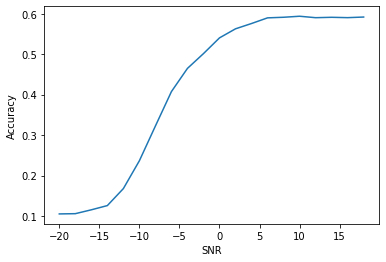

In [ ]:
plt.plot(snrs, acc)
plt.xlabel("SNR")
plt.ylabel("Accuracy")

### Using raw, integral combination

In [ ]:
fully_connected_model_raw_int = getFullyConnectedLayerModel((4,129))
X_train_raw_int, Y_t_raw_int, X_val_raw_int, Y_v_raw_int, X_test_raw_int, Y_ts_raw_int = split_data(X_raw_int, labels)
Y_train_raw_int = arange_output(Y_t_raw_int)
Y_val_raw_int = arange_output(Y_v_raw_int)
Y_test_raw_int = arange_output(Y_ts_raw_int)
early_stopping = EarlyStopping()
fully_connected_model_raw_int.fit(X_train_raw_int, Y_train_raw_int, batch_size=1024, epochs=100, validation_data=(X_val_raw_int, Y_val_raw_int), callbacks=[early_stopping])

Epoch 1/100
780/780 [==============================] - 3s 3ms/step - loss: 2.1425 - accuracy: 0.1942 - val_loss: 1.8361 - val_accuracy: 0.2937
Epoch 2/100
780/780 [==============================] - 2s 3ms/step - loss: 1.8044 - accuracy: 0.3012 - val_loss: 1.7415 - val_accuracy: 0.3257
Epoch 3/100
780/780 [==============================] - 2s 3ms/step - loss: 1.7325 - accuracy: 0.3291 - val_loss: 1.7082 - val_accuracy: 0.3382
Epoch 4/100
780/780 [==============================] - 2s 3ms/step - loss: 1.7049 - accuracy: 0.3431 - val_loss: 1.6911 - val_accuracy: 0.3426
Epoch 5/100
780/780 [==============================] - 2s 3ms/step - loss: 1.6892 - accuracy: 0.3514 - val_loss: 1.6804 - val_accuracy: 0.3547
Epoch 6/100
780/780 [==============================] - 3s 3ms/step - loss: 1.6794 - accuracy: 0.3564 - val_loss: 1.6731 - val_accuracy: 0.3589
Epoch 7/100
780/780 [==============================] - 3s 3ms/step - loss: 1.6698 - accuracy: 0.3610 - val_loss: 1.6679 - val_accuracy: 0.3595

In [ ]:
fully_connected_model_raw_int.evaluate(X_test_raw_int, Y_test_raw_int, batch_size=1024)

352/352 [==============================] - 1s 3ms/step - loss: 1.6401 - accuracy: 0.3667


[1.6400874853134155, 0.3667416572570801]

In [ ]:
acc = []
for snr in snrs:
  print("SNR ==> ", snr)
  X_test_snr = X_test_raw_int[np.argwhere(Y_ts_raw_int[:,1] == str(snr))]
  X_test_snr = X_test_snr.reshape((X_test_snr.shape[0], 4, 129))
  Y_test_snr = Y_test_raw_int[np.argwhere(Y_ts_raw_int[:,1] == str(snr))]
  Y_test_snr = Y_test_snr.reshape(Y_test_snr.shape[0], 10)
  fully_connected_model_raw_int.evaluate(X_test_snr, Y_test_snr)

  y_pred = fully_connected_model_raw_int.predict(X_test_snr)
  cm = confusion_matrix(Y_test_snr.argmax(axis=1), y_pred.argmax(axis=1))
  print(cm)
  true_values = np.sum(np.diag(cm))
  accuracy = true_values / np.sum(cm)
  print("Accuracy: ", accuracy)
  acc.append(accuracy)
  print()
acc = np.array(acc)

SNR ==>  -20
559/559 [==============================] - 1s 2ms/step - loss: 2.4828 - accuracy: 0.0998
[[ 52 278 568 213 472   1   0   0  57 174]
 [ 65 289 555 228 447   1   0   0  53 180]
 [ 67 252 540 263 451   0   0   0  52 145]
 [ 57 222 557 249 468   1   0   0  59 148]
 [ 42 241 525 249 411   0   0   0  69 163]
 [ 74 223 551 283 468   1   0   0  58 135]
 [ 57 205 575 282 461   0   0   0  71 138]
 [ 77 185 591 322 393   2   0   0 101 121]
 [ 69 251 563 279 427   2   0   0  67 177]
 [ 71 278 544 247 411   4   0   0  61 174]]
Accuracy:  0.099815260594525

SNR ==>  -18
566/566 [==============================] - 1s 2ms/step - loss: 2.4552 - accuracy: 0.1087
[[ 61 265 532 249 450   1   0   0  62 147]
 [ 50 334 516 233 418   2   0   0  49 197]
 [ 69 249 579 240 444   1   0   0  87 165]
 [ 52 231 565 249 430   2   0   0  62 170]
 [ 63 243 556 264 495   0   0   0  66 138]
 [ 62 237 591 286 433   1   0   0  73 145]
 [ 92 236 607 282 423   1   0   0 100 134]
 [121 145 577 424 328   2   0   0 

Text(0, 0.5, 'Accuracy')

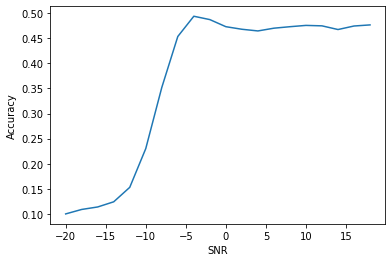

In [ ]:
plt.plot(snrs, acc)
plt.xlabel("SNR")
plt.ylabel("Accuracy")

### Using derivative, integral combination

In [ ]:
fully_connected_model_der_int = getFullyConnectedLayerModel((4,129))
X_train_der_int, Y_t_der_int, X_val_der_int, Y_v_der_int, X_test_der_int, Y_ts_der_int = split_data(X_der_int, labels)
Y_train_der_int = arange_output(Y_t_der_int)
Y_val_der_int = arange_output(Y_v_der_int)
Y_test_der_int = arange_output(Y_ts_der_int)
early_stopping = EarlyStopping()
fully_connected_model_der_int.fit(X_train_der_int, Y_train_der_int, batch_size=1024, epochs=100, validation_data=(X_val_der_int, Y_val_der_int), callbacks=[early_stopping])

Epoch 1/100
780/780 [==============================] - 3s 4ms/step - loss: 1.9100 - accuracy: 0.2660 - val_loss: 1.7024 - val_accuracy: 0.3425
Epoch 2/100
780/780 [==============================] - 3s 3ms/step - loss: 1.6891 - accuracy: 0.3532 - val_loss: 1.6688 - val_accuracy: 0.3515
Epoch 3/100
780/780 [==============================] - 3s 3ms/step - loss: 1.6593 - accuracy: 0.3620 - val_loss: 1.6429 - val_accuracy: 0.3671
Epoch 4/100
780/780 [==============================] - 2s 3ms/step - loss: 1.6350 - accuracy: 0.3711 - val_loss: 1.6265 - val_accuracy: 0.3752
Epoch 5/100
780/780 [==============================] - 2s 3ms/step - loss: 1.6159 - accuracy: 0.3788 - val_loss: 1.6188 - val_accuracy: 0.3807
Epoch 6/100
780/780 [==============================] - 2s 3ms/step - loss: 1.6042 - accuracy: 0.3831 - val_loss: 1.6061 - val_accuracy: 0.3815
Epoch 7/100
780/780 [==============================] - 3s 3ms/step - loss: 1.5911 - accuracy: 0.3882 - val_loss: 1.6002 - val_accuracy: 0.3905

In [ ]:
fully_connected_model_der_int.evaluate(X_test_der_int, Y_test_der_int, batch_size=1024)

352/352 [==============================] - 1s 3ms/step - loss: 1.5389 - accuracy: 0.4088


[1.538931131362915, 0.40883609652519226]

In [ ]:
acc = []
for snr in snrs:
  print("SNR ==> ", snr)
  X_test_snr = X_test_der_int[np.argwhere(Y_ts_der_int[:,1] == str(snr))]
  X_test_snr = X_test_snr.reshape((X_test_snr.shape[0], 4, 129))
  Y_test_snr = Y_test_der_int[np.argwhere(Y_ts_der_int[:,1] == str(snr))]
  Y_test_snr = Y_test_snr.reshape(Y_test_snr.shape[0], 10)
  fully_connected_model_der_int.evaluate(X_test_snr, Y_test_snr)

  y_pred = fully_connected_model_der_int.predict(X_test_snr)
  cm = confusion_matrix(Y_test_snr.argmax(axis=1), y_pred.argmax(axis=1))
  print(cm)
  true_values = np.sum(np.diag(cm))
  accuracy = true_values / np.sum(cm)
  print("Accuracy: ", accuracy)
  acc.append(accuracy)
  print()
acc = np.array(acc)

SNR ==>  -20
555/555 [==============================] - 1s 2ms/step - loss: 2.5555 - accuracy: 0.1007
[[214 251 442 234 361  92  12   0  57  81]
 [235 270 442 219 350 103  18   3  52 115]
 [213 240 482 248 357  93  13   3  66  95]
 [238 233 455 246 339  94  19   0  63  91]
 [219 258 428 233 321  76  16   4  59 107]
 [241 253 444 240 357  74  19   0  67 103]
 [226 194 463 228 342  93  17   0  68  92]
 [280 240 453 258 344  84  25   1  83  76]
 [238 237 441 218 362 103  14   3  56 102]
 [239 298 405 202 358  83   6   1  52 106]]
Accuracy:  0.10068172854808721

SNR ==>  -18
562/562 [==============================] - 1s 2ms/step - loss: 2.5302 - accuracy: 0.1074
[[260 278 462 245 312  75  17   2  60  97]
 [207 322 430 207 346  82  12   1  66 125]
 [243 252 449 215 361  78  27   2  61 110]
 [226 262 487 251 361  79  14   4  56  82]
 [221 278 426 236 350  79  15   2  59 105]
 [233 258 445 247 358 102  14   0  61  89]
 [262 213 479 250 341  89  22   0  67  91]
 [309 144 420 278 309 129  39   

Text(0, 0.5, 'Accuracy')

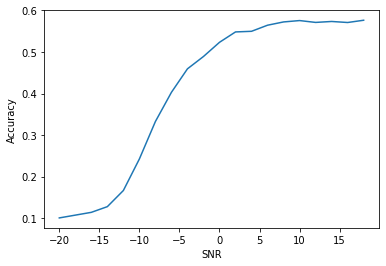

In [ ]:
plt.plot(snrs, acc)
plt.xlabel("SNR")
plt.ylabel("Accuracy")

###Using raw, derivative, integral combination

In [ ]:
fully_connected_model_raw_der_int = getFullyConnectedLayerModel((6,129))
X_train_raw_der_int, Y_t_raw_der_int, X_val_raw_der_int, Y_v_raw_der_int, X_test_raw_der_int, Y_ts_raw_der_int = split_data(X_raw_der_int, labels)
Y_train_raw_der_int = arange_output(Y_t_raw_der_int)
Y_val_raw_der_int = arange_output(Y_v_raw_der_int)
Y_test_raw_der_int = arange_output(Y_ts_raw_der_int)
early_stopping = EarlyStopping()
fully_connected_model_raw_der_int.fit(X_train_raw_der_int, Y_train_raw_der_int, batch_size=1024, epochs=100, validation_data=(X_val_raw_der_int, Y_val_raw_der_int), callbacks=[early_stopping])

Epoch 1/100
780/780 [==============================] - 5s 4ms/step - loss: 1.8942 - accuracy: 0.2725 - val_loss: 1.6993 - val_accuracy: 0.3455
Epoch 2/100
780/780 [==============================] - 3s 4ms/step - loss: 1.6811 - accuracy: 0.3553 - val_loss: 1.6652 - val_accuracy: 0.3588
Epoch 3/100
780/780 [==============================] - 3s 4ms/step - loss: 1.6516 - accuracy: 0.3643 - val_loss: 1.6493 - val_accuracy: 0.3611
Epoch 4/100
780/780 [==============================] - 3s 4ms/step - loss: 1.6303 - accuracy: 0.3707 - val_loss: 1.6326 - val_accuracy: 0.3658
Epoch 5/100
780/780 [==============================] - 3s 4ms/step - loss: 1.6164 - accuracy: 0.3758 - val_loss: 1.6255 - val_accuracy: 0.3780
Epoch 6/100
780/780 [==============================] - 3s 4ms/step - loss: 1.6020 - accuracy: 0.3821 - val_loss: 1.6144 - val_accuracy: 0.3723
Epoch 7/100
780/780 [==============================] - 3s 4ms/step - loss: 1.5923 - accuracy: 0.3851 - val_loss: 1.6101 - val_accuracy: 0.3819

In [ ]:
fully_connected_model_raw_der_int.evaluate(X_test_raw_der_int, Y_test_raw_der_int, batch_size=1024)

352/352 [==============================] - 1s 3ms/step - loss: 1.5161 - accuracy: 0.4165


[1.5160731077194214, 0.4165000021457672]

In [ ]:
acc = []
for snr in snrs:
  print("SNR ==> ", snr)
  X_test_snr = X_test_raw_der_int[np.argwhere(Y_ts_raw_der_int[:,1] == str(snr))]
  X_test_snr = X_test_snr.reshape((X_test_snr.shape[0], 6, 129))
  Y_test_snr = Y_test_raw_der_int[np.argwhere(Y_ts_raw_der_int[:,1] == str(snr))]
  Y_test_snr = Y_test_snr.reshape(Y_test_snr.shape[0], 10)
  fully_connected_model_raw_der_int.evaluate(X_test_snr, Y_test_snr)

  y_pred = fully_connected_model_raw_der_int.predict(X_test_snr)
  cm = confusion_matrix(Y_test_snr.argmax(axis=1), y_pred.argmax(axis=1))
  print(cm)
  true_values = np.sum(np.diag(cm))
  accuracy = true_values / np.sum(cm)
  print("Accuracy: ", accuracy)
  acc.append(accuracy)
  print()
acc = np.array(acc)

SNR ==>  -20
560/560 [==============================] - 1s 2ms/step - loss: 2.5575 - accuracy: 0.1049
[[ 91 278 419 301 264 198  15   2  72 137]
 [ 86 291 403 282 303 167  20   2  96 130]
 [102 252 428 303 307 199  25   6  80 126]
 [ 87 233 413 313 276 195  17   5  90 112]
 [106 219 362 331 309 196  17   2  93 138]
 [ 86 222 419 332 313 205  19   5  73 133]
 [ 99 252 391 341 275 203  27   2  93 115]
 [109 201 365 387 285 196  18   3 112  92]
 [ 91 258 382 326 328 205  22   4  76 131]
 [ 73 270 371 349 277 206  21   2  97 134]]
Accuracy:  0.10488963397597094

SNR ==>  -18
567/567 [==============================] - 1s 2ms/step - loss: 2.5176 - accuracy: 0.1086
[[ 76 280 415 315 266 234  12   5  82 118]
 [ 94 310 355 297 288 189  19   1  90 145]
 [ 92 241 436 315 270 232  14   3 103 123]
 [103 249 393 329 280 200  19   3  98 126]
 [ 92 242 359 357 313 195  21   5  94 125]
 [105 229 396 355 267 238  20   5  92 115]
 [101 225 404 316 268 218  22   5 125 114]
 [139 137 346 453 204 248  39  1

Text(0, 0.5, 'Accuracy')

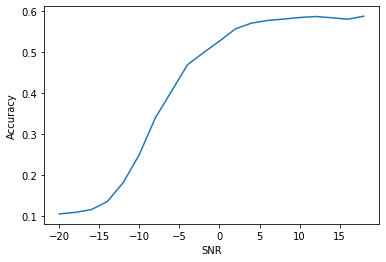

In [ ]:
plt.plot(snrs, acc)
plt.xlabel("SNR")
plt.ylabel("Accuracy")

# 5) CNN

In [ ]:
def getCNN(shape):
  CNN = Sequential()
  CNN.add(Conv2D(filters=3, kernel_size=2, strides= 2, activation='relu', padding='valid', input_shape=shape))
  CNN.add(Reshape((32, 2, 3)))
  CNN.add(Conv2D(filters=3, kernel_size=(2,1), strides=(2,1), activation='relu', padding='valid'))
  CNN.add(Flatten())
  CNN.add(Dense(128, activation='relu'))
  CNN.add(Dense(10, activation='softmax'))
  CNN.compile(optimizer='adam', loss='categorical_crossentropy', metrics=[metrics.categorical_accuracy])
  # print(CNN.summary())
  return CNN

In [ ]:
def getCNNMultipleChannels(shape):
  CNN = Sequential()
  CNN.add(Conv2D(filters=3, kernel_size=2, strides= 2, activation='relu', padding='valid', input_shape=shape))
  CNN.add(Reshape((32, 2, 3)))
  CNN.add(Conv2D(filters=3, kernel_size=(2,1), strides=(2,1), activation='relu', padding='valid'))
  CNN.add(Flatten())
  CNN.add(Dense(128, activation='relu'))
  CNN.add(Dense(10, activation='softmax'))
  CNN.compile(optimizer='adam', loss='categorical_crossentropy', metrics=[metrics.categorical_accuracy])
  # print(CNN.summary())
  return CNN

### Raw data

In [ ]:
X = X.reshape(X.shape[0], 1, 2, 128)
X = X.transpose((0, 3, 2, 1))
X_train, Y_t, X_val, Y_v, X_test, Y_ts = split_data(X, labels)
Y_train = arange_output(Y_t)
Y_val = arange_output(Y_v)
Y_test = arange_output(Y_ts)
CNN_raw = getCNN((128, 2, 1))
CNN_raw.fit(X_train, Y_train, batch_size=1024, epochs=100, validation_data=(X_val, Y_val))

Epoch 1/100
780/780 [==============================] - 14s 17ms/step - loss: 2.1843 - categorical_accuracy: 0.1613 - val_loss: 2.0035 - val_categorical_accuracy: 0.2206
Epoch 2/100
780/780 [==============================] - 13s 16ms/step - loss: 1.9542 - categorical_accuracy: 0.2347 - val_loss: 1.7981 - val_categorical_accuracy: 0.2884
Epoch 3/100
780/780 [==============================] - 13s 16ms/step - loss: 1.7704 - categorical_accuracy: 0.2969 - val_loss: 1.7296 - val_categorical_accuracy: 0.3041
Epoch 4/100
780/780 [==============================] - 13s 16ms/step - loss: 1.7193 - categorical_accuracy: 0.3140 - val_loss: 1.7006 - val_categorical_accuracy: 0.3170
Epoch 5/100
780/780 [==============================] - 13s 16ms/step - loss: 1.6810 - categorical_accuracy: 0.3362 - val_loss: 1.6423 - val_categorical_accuracy: 0.3577
Epoch 6/100
780/780 [==============================] - 13s 16ms/step - loss: 1.6248 - categorical_accuracy: 0.3641 - val_loss: 1.6012 - val_categorical_acc

In [ ]:
CNN_raw.evaluate(X_test, Y_test, batch_size=1024)

352/352 [==============================] - 3s 9ms/step - loss: 1.4600 - categorical_accuracy: 0.4216


[1.4600332975387573, 0.42159444093704224]

In [ ]:
acc = []
for snr in snrs:
  print("SNR ==> ", snr)
  X_test_snr = X_test[np.argwhere(Y_ts[:,1] == str(snr))]
  X_test_snr = X_test_snr.reshape((X_test_snr.shape[0], 128, 2, 1))
  Y_test_snr = Y_test[np.argwhere(Y_ts[:,1] == str(snr))]
  Y_test_snr = Y_test_snr.reshape(Y_test_snr.shape[0], 10)
  CNN_raw.evaluate(X_test_snr, Y_test_snr)

  y_pred = CNN_raw.predict(X_test_snr)
  cm = confusion_matrix(Y_test_snr.argmax(axis=1), y_pred.argmax(axis=1))
  print(cm)
  true_values = np.sum(np.diag(cm))
  accuracy = true_values / np.sum(cm)
  print("Accuracy: ", accuracy)
  acc.append(accuracy)
  print()
acc = np.array(acc)

SNR ==>  -20
565/565 [==============================] - 1s 2ms/step - loss: 2.4127 - categorical_accuracy: 0.1035
[[206 163 711  59 291  53  14   3  94 149]
 [187 183 685  80 281  47  28   8  87 197]
 [194 173 712  84 342  43  15   6  74 172]
 [203 159 718  91 349  49  21   1  82 151]
 [215 156 695  90 327  40  19   2 100 160]
 [223 142 715  71 326  33  23   3 102 171]
 [222 144 647  78 348  43  26   1 104 158]
 [209 130 691  81 353  44  19   5  91 177]
 [193 159 726  79 333  40  22   3  89 192]
 [205 180 679  99 347  47  19   8  86 197]]
Accuracy:  0.10353423443385774

SNR ==>  -18
559/559 [==============================] - 1s 2ms/step - loss: 2.3935 - categorical_accuracy: 0.1092
[[226 133 637  83 354  42  16   5  86 179]
 [167 215 615  76 284  38  16   5  70 219]
 [225 164 672  91 331  49  13   6  84 148]
 [219 172 650  78 337  44  17   5  99 165]
 [199 162 691  74 367  43  19   3  70 171]
 [195 171 711  94 348  62  22   4 102 164]
 [252 154 624  83 351  55  26   5  89 160]
 [247 15

Text(0, 0.5, 'Accuracy')

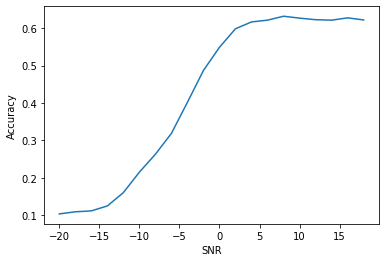

In [ ]:
plt.plot(snrs, acc)
plt.xlabel("SNR")
plt.ylabel("Accuracy")

###Using the derivative

In [ ]:
X_deriv = X_deriv.reshape(X_deriv.shape[0], 1, 2, 128)
X_deriv = X_deriv.transpose((0, 3, 2, 1))
X_train_der, Y_t_der, X_val_der, Y_v_der, X_test_der, Y_ts_der = split_data(X_deriv, labels)
Y_train_der = arange_output(Y_t_der)
Y_val_der = arange_output(Y_v_der)
Y_test_der = arange_output(Y_ts_der)

CNN_der = getCNN((128, 2, 1))
CNN_der.fit(X_train_der, Y_train_der, batch_size=1024, epochs=100, validation_data=(X_val_der, Y_val_der))

Epoch 1/100
780/780 [==============================] - 13s 17ms/step - loss: 2.0416 - categorical_accuracy: 0.2099 - val_loss: 1.7743 - val_categorical_accuracy: 0.2967
Epoch 2/100
780/780 [==============================] - 13s 16ms/step - loss: 1.7301 - categorical_accuracy: 0.3118 - val_loss: 1.6474 - val_categorical_accuracy: 0.3416
Epoch 3/100
780/780 [==============================] - 13s 16ms/step - loss: 1.6288 - categorical_accuracy: 0.3475 - val_loss: 1.6053 - val_categorical_accuracy: 0.3536
Epoch 4/100
780/780 [==============================] - 13s 16ms/step - loss: 1.5940 - categorical_accuracy: 0.3593 - val_loss: 1.5826 - val_categorical_accuracy: 0.3601
Epoch 5/100
780/780 [==============================] - 13s 16ms/step - loss: 1.5695 - categorical_accuracy: 0.3686 - val_loss: 1.5547 - val_categorical_accuracy: 0.3745
Epoch 6/100
780/780 [==============================] - 13s 16ms/step - loss: 1.5412 - categorical_accuracy: 0.3813 - val_loss: 1.5285 - val_categorical_acc

In [ ]:
CNN_der.evaluate(X_test_der, Y_test_der, batch_size=1024)

352/352 [==============================] - 3s 9ms/step - loss: 1.2555 - categorical_accuracy: 0.4777


[1.2554631233215332, 0.4776777923107147]

In [ ]:
acc = []
for snr in snrs:
  print("SNR ==> ", snr)
  X_test_snr = X_test_der[np.argwhere(Y_ts_der[:,1] == str(snr))]
  X_test_snr = X_test_snr.reshape((X_test_snr.shape[0], 128, 2, 1))
  Y_test_snr = Y_test_der[np.argwhere(Y_ts_der[:,1] == str(snr))]
  Y_test_snr = Y_test_snr.reshape(Y_test_snr.shape[0], 10)
  CNN_der.evaluate(X_test_snr, Y_test_snr)

  y_pred = CNN_der.predict(X_test_snr)
  cm = confusion_matrix(Y_test_snr.argmax(axis=1), y_pred.argmax(axis=1))
  print(cm)
  true_values = np.sum(np.diag(cm))
  accuracy = true_values / np.sum(cm)
  print("Accuracy: ", accuracy)
  acc.append(accuracy)
  print()
acc = np.array(acc)

SNR ==>  -20
566/566 [==============================] - 1s 2ms/step - loss: 2.3701 - categorical_accuracy: 0.1073
[[202 283 370 193 254  64   5   0 344  90]
 [182 360 360 184 217  61   5   0 357 100]
 [188 274 400 206 235  80  15   0 349  93]
 [210 250 335 201 258  55  11   0 375 100]
 [193 262 374 214 255  64   7   0 347  96]
 [210 262 354 203 240  51   8   0 356 104]
 [193 281 383 212 274  84  13   0 346  78]
 [179 243 326 251 259  63  12   0 356  93]
 [177 270 363 197 236  51  15   0 366 104]
 [183 346 375 219 224  49  11   0 318  95]]
Accuracy:  0.10728286676605378

SNR ==>  -18
564/564 [==============================] - 1s 2ms/step - loss: 2.3576 - categorical_accuracy: 0.1059
[[202 275 400 214 218  54  10   0 323 101]
 [177 405 340 173 195  40   6   0 323 136]
 [181 275 367 209 250  54  21   0 335 101]
 [217 283 394 190 260  60   9   0 332  89]
 [184 278 394 202 227  59  11   0 345  91]
 [207 290 366 202 245  79   8   0 337 102]
 [200 257 365 207 239  69   8   0 337  90]
 [165 22

Text(0, 0.5, 'Accuracy')

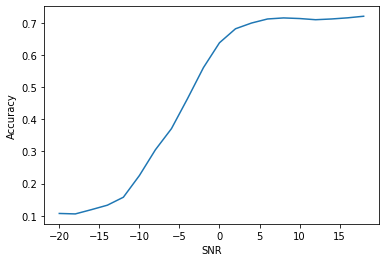

In [ ]:
plt.plot(snrs, acc)
plt.xlabel("SNR")
plt.ylabel("Accuracy")

###Using the integral 

In [ ]:
X_integ = X_integ.reshape(X_integ.shape[0], 1, 2, 129)
X_integ = X_integ.transpose((0, 3, 2, 1))
X_train_int, Y_t_int, X_val_int, Y_v_int, X_test_int, Y_ts_int = split_data(X_integ, labels)
Y_train_int = arange_output(Y_t_int)
Y_val_int = arange_output(Y_v_int)
Y_test_int = arange_output(Y_ts_int)

CNN_int = getCNN((129, 2, 1))
CNN_int.fit(X_train_int, Y_train_int, batch_size=1024, epochs=100, validation_data=(X_val_int, Y_val_int))

Epoch 1/100
780/780 [==============================] - 14s 17ms/step - loss: 2.2898 - categorical_accuracy: 0.1165 - val_loss: 2.2601 - val_categorical_accuracy: 0.1439
Epoch 2/100
780/780 [==============================] - 13s 16ms/step - loss: 2.2190 - categorical_accuracy: 0.1451 - val_loss: 2.1577 - val_categorical_accuracy: 0.1690
Epoch 3/100
780/780 [==============================] - 13s 16ms/step - loss: 2.1521 - categorical_accuracy: 0.1665 - val_loss: 2.1230 - val_categorical_accuracy: 0.1729
Epoch 4/100
780/780 [==============================] - 13s 16ms/step - loss: 2.1152 - categorical_accuracy: 0.1715 - val_loss: 2.0869 - val_categorical_accuracy: 0.1787
Epoch 5/100
780/780 [==============================] - 13s 16ms/step - loss: 2.0945 - categorical_accuracy: 0.1788 - val_loss: 2.0922 - val_categorical_accuracy: 0.1831
Epoch 6/100
780/780 [==============================] - 13s 16ms/step - loss: 2.0784 - categorical_accuracy: 0.1856 - val_loss: 2.0542 - val_categorical_acc

In [ ]:
CNN_int.evaluate(X_test_int, Y_test_int, batch_size=1024)

352/352 [==============================] - 3s 8ms/step - loss: 1.7988 - categorical_accuracy: 0.3023


[1.7988460063934326, 0.30233609676361084]

In [ ]:
acc = []
for snr in snrs:
  print("SNR ==> ", snr)
  X_test_snr = X_test_int[np.argwhere(Y_ts_int[:,1] == str(snr))]
  X_test_snr = X_test_snr.reshape((X_test_snr.shape[0], 129, 2, 1))
  Y_test_snr = Y_test_int[np.argwhere(Y_ts_int[:,1] == str(snr))]
  Y_test_snr = Y_test_snr.reshape(Y_test_snr.shape[0], 10)
  CNN_int.evaluate(X_test_snr, Y_test_snr)

  y_pred = CNN_int.predict(X_test_snr)
  cm = confusion_matrix(Y_test_snr.argmax(axis=1), y_pred.argmax(axis=1))
  print(cm)
  true_values = np.sum(np.diag(cm))
  accuracy = true_values / np.sum(cm)
  print("Accuracy: ", accuracy)
  acc.append(accuracy)
  print()
acc = np.array(acc)

SNR ==>  -20
562/562 [==============================] - 1s 1ms/step - loss: 2.4488 - categorical_accuracy: 0.1036
[[ 49 311 575 185 272  71  19   3  65 315]
 [ 59 326 494 157 261  64  16   2  58 373]
 [ 57 321 559 152 252  59  13   1  70 310]
 [ 58 280 583 159 232  66  16   0  61 300]
 [ 49 329 506 144 264  57  19   1  81 307]
 [ 53 277 587 172 229  51  15   0  65 297]
 [ 61 340 538 159 254  77  23   0  50 289]
 [ 56 250 606 179 260  67  23   3  66 303]
 [ 55 306 561 146 286  58  14   0  72 311]
 [ 54 356 511 140 261  63  18   2  60 354]]
Accuracy:  0.10356924104905618

SNR ==>  -18
565/565 [==============================] - 1s 1ms/step - loss: 2.4390 - categorical_accuracy: 0.1062
[[ 50 335 616 153 293  58  13   0  59 311]
 [ 53 374 491 138 222  49  19   3  56 380]
 [ 68 308 565 169 252  59  13   3  56 319]
 [ 59 303 556 149 260  62  19   2  77 297]
 [ 39 316 595 158 272  62  20   2  67 305]
 [ 45 273 599 161 268  56  21   5  70 323]
 [ 64 270 585 175 246  69  19   0  72 288]
 [ 70 25

Text(0, 0.5, 'Accuracy')

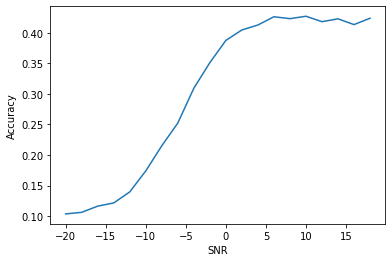

In [ ]:
plt.plot(snrs, acc)
plt.xlabel("SNR")
plt.ylabel("Accuracy")

###Using raw, derivetive combination 

In [ ]:
X_raw_der = X_raw_der.transpose((0, 3, 2, 1))

In [ ]:
X_train_raw_der, Y_t_raw_der, X_val_raw_der, Y_v_raw_der, X_test_raw_der, Y_ts_raw_der = split_data(X_raw_der, labels)
Y_train_raw_der = arange_output(Y_t_raw_der)
Y_val_raw_der = arange_output(Y_v_raw_der)
Y_test_raw_der = arange_output(Y_ts_raw_der)
CNN_raw_der = getCNNMultipleChannels((128, 2, 2))
CNN_raw_der.fit(X_train_raw_der, Y_train_raw_der, batch_size=1024, epochs=100, validation_data=(X_val_raw_der, Y_val_raw_der))

Epoch 1/100
780/780 [==============================] - 15s 19ms/step - loss: 2.0577 - categorical_accuracy: 0.2021 - val_loss: 1.7381 - val_categorical_accuracy: 0.3018
Epoch 2/100
780/780 [==============================] - 17s 22ms/step - loss: 1.7100 - categorical_accuracy: 0.3150 - val_loss: 1.6328 - val_categorical_accuracy: 0.3482
Epoch 3/100
780/780 [==============================] - 17s 22ms/step - loss: 1.6107 - categorical_accuracy: 0.3640 - val_loss: 1.5730 - val_categorical_accuracy: 0.3745
Epoch 4/100
780/780 [==============================] - 17s 22ms/step - loss: 1.5637 - categorical_accuracy: 0.3865 - val_loss: 1.5451 - val_categorical_accuracy: 0.3886
Epoch 5/100
780/780 [==============================] - 17s 22ms/step - loss: 1.5366 - categorical_accuracy: 0.3963 - val_loss: 1.5236 - val_categorical_accuracy: 0.4015
Epoch 6/100
780/780 [==============================] - 18s 23ms/step - loss: 1.5157 - categorical_accuracy: 0.4040 - val_loss: 1.5071 - val_categorical_acc

In [ ]:
CNN_raw_der.evaluate(X_test_raw_der, Y_test_raw_der, batch_size=1024)

352/352 [==============================] - 2s 7ms/step - loss: 1.2352 - categorical_accuracy: 0.4900


[1.2352443933486938, 0.489980548620224]

In [ ]:
acc = []
for snr in snrs:
  print("SNR ==> ", snr)
  X_test_snr = X_test_raw_der[np.argwhere(Y_ts_raw_der[:,1] == str(snr))]
  X_test_snr = X_test_snr.reshape((X_test_snr.shape[0], 128, 2, 2))
  Y_test_snr = Y_test_raw_der[np.argwhere(Y_ts_raw_der[:,1] == str(snr))]
  Y_test_snr = Y_test_snr.reshape(Y_test_snr.shape[0], 10)
  CNN_raw_der.evaluate(X_test_snr, Y_test_snr)

  y_pred = CNN_raw_der.predict(X_test_snr)
  cm = confusion_matrix(Y_test_snr.argmax(axis=1), y_pred.argmax(axis=1))
  print(cm)
  true_values = np.sum(np.diag(cm))
  accuracy = true_values / np.sum(cm)
  print("Accuracy: ", accuracy)
  acc.append(accuracy)
  print()
acc = np.array(acc)

SNR ==>  -20
565/565 [==============================] - 1s 1ms/step - loss: 2.3826 - categorical_accuracy: 0.1038
[[247 190 263 291 278  62   7   0 368  87]
 [231 225 251 243 249  56   7   0 403 132]
 [227 164 238 308 324  57  10   0 403  93]
 [250 149 245 273 285  71   8   0 382  94]
 [232 178 280 305 322  62  11   0 393 120]
 [226 166 265 306 297  55   9   0 423  90]
 [227 160 285 274 264  65  12   0 409  76]
 [193 165 261 302 294  68  12   1 393 101]
 [231 156 278 276 270  56   7   0 391  94]
 [225 210 276 264 246  60  15   0 429 111]]
Accuracy:  0.1037746291786584

SNR ==>  -18
567/567 [==============================] - 1s 1ms/step - loss: 2.3626 - categorical_accuracy: 0.1116
[[243 171 262 287 278  65  15   0 378 101]
 [181 273 285 266 231  50   9   0 393 142]
 [216 188 277 298 302  56  10   1 398  97]
 [223 187 265 292 301  70  10   1 423  89]
 [243 178 250 313 319  59  10   0 351  95]
 [202 158 264 290 302  67   9   0 391 106]
 [213 159 240 294 276  76  12   0 402 107]
 [169 130

Text(0, 0.5, 'Accuracy')

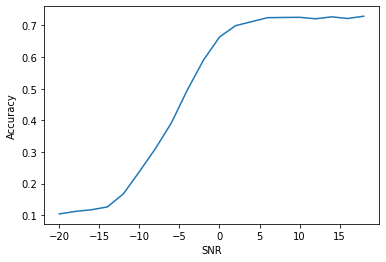

In [ ]:
plt.plot(snrs, acc)
plt.xlabel("SNR")
plt.ylabel("Accuracy")

### Using raw, integral combination

In [ ]:
X_raw_int = X_raw_int.transpose((0, 3, 2, 1))
X_train_raw_int, Y_t_raw_int, X_val_raw_int, Y_v_raw_int, X_test_raw_int, Y_ts_raw_int = split_data(X_raw_int, labels)
Y_train_raw_int = arange_output(Y_t_raw_int)
Y_val_raw_int = arange_output(Y_v_raw_int)
Y_test_raw_int = arange_output(Y_ts_raw_int)

CNN_raw_int = getCNNMultipleChannels((129, 2, 2))
CNN_raw_int.fit(X_train_raw_int, Y_train_raw_int, batch_size=1024, epochs=100, validation_data=(X_val_raw_int, Y_val_raw_int))

Epoch 1/100
780/780 [==============================] - 12s 15ms/step - loss: 2.1824 - categorical_accuracy: 0.1552 - val_loss: 1.9958 - val_categorical_accuracy: 0.2187
Epoch 2/100
780/780 [==============================] - 11s 14ms/step - loss: 1.9631 - categorical_accuracy: 0.2300 - val_loss: 1.8525 - val_categorical_accuracy: 0.2657
Epoch 3/100
780/780 [==============================] - 11s 14ms/step - loss: 1.8291 - categorical_accuracy: 0.2721 - val_loss: 1.7615 - val_categorical_accuracy: 0.2950
Epoch 4/100
780/780 [==============================] - 11s 14ms/step - loss: 1.7560 - categorical_accuracy: 0.2995 - val_loss: 1.7131 - val_categorical_accuracy: 0.3178
Epoch 5/100
780/780 [==============================] - 11s 14ms/step - loss: 1.7139 - categorical_accuracy: 0.3211 - val_loss: 1.6862 - val_categorical_accuracy: 0.3344
Epoch 6/100
780/780 [==============================] - 11s 14ms/step - loss: 1.6891 - categorical_accuracy: 0.3332 - val_loss: 1.6648 - val_categorical_acc

In [ ]:
CNN_raw_int.evaluate(X_test_raw_int, Y_test_raw_int, batch_size=1024)

352/352 [==============================] - 3s 7ms/step - loss: 1.4585 - categorical_accuracy: 0.4241


[1.4584585428237915, 0.4240666627883911]

In [ ]:
acc = []
for snr in snrs:
  print("SNR ==> ", snr)
  X_test_snr = X_test_raw_int[np.argwhere(Y_ts_raw_int[:,1] == str(snr))]
  X_test_snr = X_test_snr.reshape((X_test_snr.shape[0], 129, 2, 2))
  Y_test_snr = Y_test_raw_int[np.argwhere(Y_ts_raw_int[:,1] == str(snr))]
  Y_test_snr = Y_test_snr.reshape(Y_test_snr.shape[0], 10)
  CNN_raw_int.evaluate(X_test_snr, Y_test_snr)

  y_pred = CNN_raw_int.predict(X_test_snr)
  cm = confusion_matrix(Y_test_snr.argmax(axis=1), y_pred.argmax(axis=1))
  print(cm)
  true_values = np.sum(np.diag(cm))
  accuracy = true_values / np.sum(cm)
  print("Accuracy: ", accuracy)
  acc.append(accuracy)
  print()
acc = np.array(acc)

SNR ==>  -20
562/562 [==============================] - 1s 1ms/step - loss: 2.4346 - categorical_accuracy: 0.1049
[[192 167 620 133 292  28  14   2 105 232]
 [194 211 595 115 267  24  26   2  86 283]
 [213 177 624 134 323  34  21   2  81 209]
 [211 189 637 120 297  31  19   2  68 203]
 [205 174 631 119 321  40  24   0  91 227]
 [175 168 625 138 300  43  15   0  86 225]
 [196 185 569 137 294  34  22   3 100 227]
 [236 152 628 135 323  33  26   3 106 186]
 [199 166 646 128 267  37  28   1  95 209]
 [190 214 611 114 281  32  32   3  79 255]]
Accuracy:  0.10494101936345426

SNR ==>  -18
562/562 [==============================] - 1s 1ms/step - loss: 2.4273 - categorical_accuracy: 0.1063
[[176 172 647 128 286  34  14   1 104 208]
 [209 240 585 124 237  29  22   2  94 258]
 [214 173 641 140 311  28  18   1  91 218]
 [201 176 640 146 290  30  18   0  87 228]
 [188 191 624 139 290  48  18   2  96 197]
 [203 167 604 144 294  44  29   2  83 193]
 [209 181 612 127 316  28  26   2  99 221]
 [262 12

Text(0, 0.5, 'Accuracy')

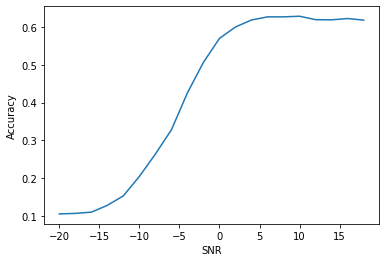

In [ ]:
plt.plot(snrs, acc)
plt.xlabel("SNR")
plt.ylabel("Accuracy")

### Using derivative, integral combination

In [ ]:
X_der_int = X_der_int.transpose((0, 3, 2, 1))
X_train_der_int, Y_t_der_int, X_val_der_int, Y_v_der_int, X_test_der_int, Y_ts_der_int = split_data(X_der_int, labels)
Y_train_der_int = arange_output(Y_t_der_int)
Y_val_der_int = arange_output(Y_v_der_int)
Y_test_der_int = arange_output(Y_ts_der_int)

CNN_der_int = getCNNMultipleChannels((129, 2, 2))
CNN_der_int.fit(X_train_der_int, Y_train_der_int, batch_size=1024, epochs=100, validation_data=(X_val_der_int, Y_val_der_int))

Epoch 1/100
780/780 [==============================] - 12s 14ms/step - loss: 2.0936 - categorical_accuracy: 0.2021 - val_loss: 1.8047 - val_categorical_accuracy: 0.2931
Epoch 2/100
780/780 [==============================] - 11s 14ms/step - loss: 1.7709 - categorical_accuracy: 0.3061 - val_loss: 1.7191 - val_categorical_accuracy: 0.3252
Epoch 3/100
780/780 [==============================] - 11s 14ms/step - loss: 1.6970 - categorical_accuracy: 0.3338 - val_loss: 1.6185 - val_categorical_accuracy: 0.3611
Epoch 4/100
780/780 [==============================] - 11s 14ms/step - loss: 1.6011 - categorical_accuracy: 0.3664 - val_loss: 1.5658 - val_categorical_accuracy: 0.3827
Epoch 5/100
780/780 [==============================] - 11s 14ms/step - loss: 1.5580 - categorical_accuracy: 0.3843 - val_loss: 1.5430 - val_categorical_accuracy: 0.3878
Epoch 6/100
780/780 [==============================] - 11s 14ms/step - loss: 1.5377 - categorical_accuracy: 0.3925 - val_loss: 1.5291 - val_categorical_acc

In [ ]:
CNN_der_int.evaluate(X_test_der_int, Y_test_der_int, batch_size=1024)

352/352 [==============================] - 3s 7ms/step - loss: 1.3877 - categorical_accuracy: 0.4483


[1.3876619338989258, 0.4483305513858795]

In [ ]:
acc = []
for snr in snrs:
  print("SNR ==> ", snr)
  X_test_snr = X_test_der_int[np.argwhere(Y_ts_der_int[:,1] == str(snr))]
  X_test_snr = X_test_snr.reshape((X_test_snr.shape[0], 129, 2, 2))
  Y_test_snr = Y_test_der_int[np.argwhere(Y_ts_der_int[:,1] == str(snr))]
  Y_test_snr = Y_test_snr.reshape(Y_test_snr.shape[0], 10)
  CNN_der_int.evaluate(X_test_snr, Y_test_snr)

  y_pred = CNN_der_int.predict(X_test_snr)
  cm = confusion_matrix(Y_test_snr.argmax(axis=1), y_pred.argmax(axis=1))
  print(cm)
  true_values = np.sum(np.diag(cm))
  accuracy = true_values / np.sum(cm)
  print("Accuracy: ", accuracy)
  acc.append(accuracy)
  print()
acc = np.array(acc)

SNR ==>  -20
564/564 [==============================] - 1s 1ms/step - loss: 2.4709 - categorical_accuracy: 0.1002
[[262 213 526 116 277 136  31   0 100 143]
 [264 261 439 118 259 160  19   1 117 179]
 [300 188 453 128 271 170  26   0 101 154]
 [303 195 479 113 252 156  20   0 112 121]
 [306 196 463 138 277 156  22   0 104 124]
 [306 197 488 116 255 150  25   1 115 151]
 [303 166 518 130 304 152  34   0 116 135]
 [316 177 490 129 268 143  36   0 111 123]
 [286 196 463 133 279 163  25   0  99 158]
 [284 222 474 126 272 141  34   1 103 157]]
Accuracy:  0.1002219755826859

SNR ==>  -18
564/564 [==============================] - 1s 1ms/step - loss: 2.4484 - categorical_accuracy: 0.1053
[[310 187 450 127 249 148  21   0  92 139]
 [281 280 431 114 252 152  24   0  92 173]
 [270 189 447 141 284 167  29   0 104 123]
 [296 210 473 122 246 152  29   0 101 138]
 [279 227 509 135 283 144  25   0 112 158]
 [307 207 465 122 274 161  25   1 105 145]
 [326 189 498 133 256 154  26   0 105 142]
 [338 154

Text(0, 0.5, 'Accuracy')

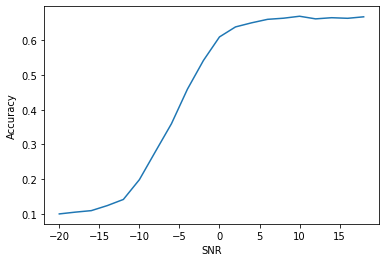

In [ ]:
plt.plot(snrs, acc)
plt.xlabel("SNR")
plt.ylabel("Accuracy")

###Using raw, derivative, integral combination

In [ ]:
X_raw_der_int = X_raw_der_int.transpose((0, 3, 2, 1))
X_train_raw_der_int, Y_t_raw_der_int, X_val_raw_der_int, Y_v_raw_der_int, X_test_raw_der_int, Y_ts_raw_der_int = split_data(X_raw_der_int, labels)
Y_train_raw_der_int = arange_output(Y_t_raw_der_int)
Y_val_raw_der_int = arange_output(Y_v_raw_der_int)
Y_test_raw_der_int = arange_output(Y_ts_raw_der_int)

CNN_raw_der_int = getCNNMultipleChannels((129, 2, 3))
CNN_raw_der_int.fit(X_train_raw_der_int, Y_train_raw_der_int, batch_size=1024, epochs=100, validation_data=(X_val_raw_der_int, Y_val_raw_der_int))

Epoch 1/100
780/780 [==============================] - 14s 18ms/step - loss: 2.0589 - categorical_accuracy: 0.2146 - val_loss: 1.7570 - val_categorical_accuracy: 0.3105
Epoch 2/100
780/780 [==============================] - 13s 17ms/step - loss: 1.7345 - categorical_accuracy: 0.3196 - val_loss: 1.6782 - val_categorical_accuracy: 0.3429
Epoch 3/100
780/780 [==============================] - 13s 17ms/step - loss: 1.6618 - categorical_accuracy: 0.3481 - val_loss: 1.6374 - val_categorical_accuracy: 0.3538
Epoch 4/100
780/780 [==============================] - 13s 17ms/step - loss: 1.6264 - categorical_accuracy: 0.3608 - val_loss: 1.6069 - val_categorical_accuracy: 0.3652
Epoch 5/100
780/780 [==============================] - 13s 17ms/step - loss: 1.5988 - categorical_accuracy: 0.3699 - val_loss: 1.5866 - val_categorical_accuracy: 0.3710
Epoch 6/100
780/780 [==============================] - 13s 17ms/step - loss: 1.5749 - categorical_accuracy: 0.3780 - val_loss: 1.5692 - val_categorical_acc

In [ ]:
CNN_raw_der_int.evaluate(X_test_raw_der_int, Y_test_raw_der_int, batch_size=1024)

352/352 [==============================] - 3s 10ms/step - loss: 1.2613 - categorical_accuracy: 0.4774


[1.2613328695297241, 0.47742778062820435]

In [ ]:
acc = []
for snr in snrs:
  print("SNR ==> ", snr)
  X_test_snr = X_test_raw_der_int[np.argwhere(Y_ts_raw_der_int[:,1] == str(snr))]
  X_test_snr = X_test_snr.reshape((X_test_snr.shape[0], 129, 2, 3))
  Y_test_snr = Y_test_raw_der_int[np.argwhere(Y_ts_raw_der_int[:,1] == str(snr))]
  Y_test_snr = Y_test_snr.reshape(Y_test_snr.shape[0], 10)
  CNN_raw_der_int.evaluate(X_test_snr, Y_test_snr)

  y_pred = CNN_raw_der_int.predict(X_test_snr)
  cm = confusion_matrix(Y_test_snr.argmax(axis=1), y_pred.argmax(axis=1))
  print(cm)
  true_values = np.sum(np.diag(cm))
  accuracy = true_values / np.sum(cm)
  print("Accuracy: ", accuracy)
  acc.append(accuracy)
  print()
acc = np.array(acc)

SNR ==>  -20
560/560 [==============================] - 1s 1ms/step - loss: 2.4042 - categorical_accuracy: 0.1036
[[ 59 251 366 276 192  52   8   0 541  65]
 [ 45 325 330 276 152  37  10   0 498  78]
 [ 66 258 349 273 186  68   5   1 547  59]
 [ 55 259 355 307 207  51  10   0 508  61]
 [ 52 255 321 289 170  55  12   0 503  73]
 [ 58 278 347 323 176  49  12   0 524  58]
 [ 59 251 362 272 175  50   9   1 548  56]
 [ 49 225 315 325 193  72  12   0 551  75]
 [ 58 266 339 288 185  59   8   0 509  60]
 [ 53 309 320 265 168  39  15   0 551  78]]
Accuracy:  0.10356763999776673

SNR ==>  -18
561/561 [==============================] - 1s 1ms/step - loss: 2.3869 - categorical_accuracy: 0.1084
[[ 69 256 337 301 177  50  10   0 530  63]
 [ 52 402 308 268 164  49   8   0 480  92]
 [ 48 244 331 290 174  59  11   1 521  49]
 [ 69 258 347 298 200  51   6   0 530  82]
 [ 62 271 329 302 186  51  13   0 524  57]
 [ 63 252 342 323 173  56   6   0 478  64]
 [ 52 247 344 302 188  51  14   1 532  84]
 [ 68 22

Text(0, 0.5, 'Accuracy')

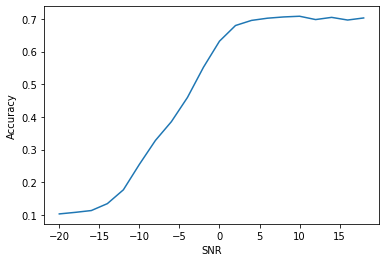

In [ ]:
plt.plot(snrs, acc)
plt.xlabel("SNR")
plt.ylabel("Accuracy")

# 6) LSTM

In [ ]:
def getLSTM(shape):
  lstm = Sequential();
  lstm.add(LSTM(shape[1], return_sequences=True, input_shape=shape))
  lstm.add(LSTM(10))
  lstm.add(Dense(10, activation='softmax'))
  lstm.compile(optimizer='adam', loss='categorical_crossentropy', metrics=[metrics.categorical_accuracy])
  # print(lstm.summary())
  return lstm

### Raw data

In [ ]:
lstm = getLSTM((2,128))
X_train, Y_t, X_val, Y_v, X_test, Y_ts = split_data(X, labels)
Y_train = arange_output(Y_t)
Y_val = arange_output(Y_v)
Y_test = arange_output(Y_ts)
lstm.fit(X_train, Y_train, batch_size=1024, epochs=100, validation_data=(X_val, Y_val))

Epoch 1/100
780/780 [==============================] - 69s 83ms/step - loss: 2.1858 - categorical_accuracy: 0.1547 - val_loss: 2.0406 - val_categorical_accuracy: 0.2047
Epoch 2/100
780/780 [==============================] - 49s 62ms/step - loss: 2.0319 - categorical_accuracy: 0.2118 - val_loss: 2.0191 - val_categorical_accuracy: 0.2177
Epoch 3/100
780/780 [==============================] - 71s 91ms/step - loss: 2.0177 - categorical_accuracy: 0.2191 - val_loss: 2.0100 - val_categorical_accuracy: 0.2194
Epoch 4/100
780/780 [==============================] - 72s 93ms/step - loss: 2.0054 - categorical_accuracy: 0.2234 - val_loss: 1.9890 - val_categorical_accuracy: 0.2285
Epoch 5/100
780/780 [==============================] - 70s 90ms/step - loss: 1.9831 - categorical_accuracy: 0.2317 - val_loss: 1.9721 - val_categorical_accuracy: 0.2340
Epoch 6/100
780/780 [==============================] - 62s 79ms/step - loss: 1.9687 - categorical_accuracy: 0.2377 - val_loss: 1.9609 - val_categorical_acc

In [ ]:
lstm.evaluate(X_test, Y_test, batch_size=1024)

352/352 [==============================] - 7s 20ms/step - loss: 1.2849 - categorical_accuracy: 0.4595


[1.28485906124115, 0.45953333377838135]

In [ ]:
acc = []
for snr in snrs:
  print("SNR ==> ", snr)
  X_test_snr = X_test[np.argwhere(Y_ts[:,1] == str(snr))]
  X_test_snr = X_test_snr.reshape((X_test_snr.shape[0], 2, 128))
  Y_test_snr = Y_test[np.argwhere(Y_ts[:,1] == str(snr))]
  Y_test_snr = Y_test_snr.reshape(Y_test_snr.shape[0], 10)
  lstm.evaluate(X_test_snr, Y_test_snr)

  y_pred = lstm.predict(X_test_snr)
  cm = confusion_matrix(Y_test_snr.argmax(axis=1), y_pred.argmax(axis=1))
  print(cm)
  true_values = np.sum(np.diag(cm))
  accuracy = true_values / np.sum(cm)
  print("Accuracy: ", accuracy)
  acc.append(accuracy)
  print()
acc = np.array(acc)

SNR ==>  -20
565/565 [==============================] - 2s 4ms/step - loss: 2.3945 - categorical_accuracy: 0.1030
[[357 234 606 446 103   2   2   0   9  64]
 [397 285 549 353 101   1   2   0   9  77]
 [394 256 612 426 105   7   2   0  19  62]
 [398 230 558 427 114   1   2   0  23  62]
 [385 257 544 394 110   2   3   0  15  55]
 [370 256 566 423 113   3   1   0  11  54]
 [391 245 558 405 107   5   0   0  12  59]
 [449 226 518 388 114   6   3   0  17  58]
 [374 262 591 425 115   2   0   0   8  62]
 [398 292 566 382  90   3   3   0  15  59]]
Accuracy:  0.10301688347633546

SNR ==>  -18
564/564 [==============================] - 2s 4ms/step - loss: 2.3727 - categorical_accuracy: 0.1037
[[360 252 638 436 104   3   1   0  16  59]
 [362 329 558 368 100   3   4   0  22  80]
 [427 243 582 408 116   5   2   0  13  55]
 [382 224 547 389 109   8   0   0  17  55]
 [401 225 512 423 106   4   3   0  10  64]
 [401 239 599 419 106   8   0   0  17  54]
 [435 215 544 379  88   3   0   0  20  57]
 [563 14

Text(0, 0.5, 'Accuracy')

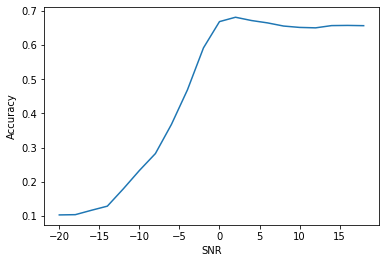

In [ ]:
plt.plot(snrs, acc)
plt.xlabel("SNR")
plt.ylabel("Accuracy")

### Derivative

In [ ]:
lstm = getLSTM((2,128))
X_train, Y_t, X_val, Y_v, X_test, Y_ts = split_data(X_deriv, labels)
Y_train = arange_output(Y_t)
Y_val = arange_output(Y_v)
Y_test = arange_output(Y_ts)
lstm.fit(X_train, Y_train, batch_size=1024, epochs=100, validation_data=(X_val, Y_val))

Epoch 1/100
780/780 [==============================] - 40s 47ms/step - loss: 1.9318 - categorical_accuracy: 0.2514 - val_loss: 1.5738 - val_categorical_accuracy: 0.3692
Epoch 2/100
780/780 [==============================] - 36s 46ms/step - loss: 1.5177 - categorical_accuracy: 0.3832 - val_loss: 1.4193 - val_categorical_accuracy: 0.4036
Epoch 3/100
780/780 [==============================] - 35s 45ms/step - loss: 1.3916 - categorical_accuracy: 0.4127 - val_loss: 1.3723 - val_categorical_accuracy: 0.4150
Epoch 4/100
780/780 [==============================] - 36s 46ms/step - loss: 1.3421 - categorical_accuracy: 0.4277 - val_loss: 1.3418 - val_categorical_accuracy: 0.4291
Epoch 5/100
780/780 [==============================] - 35s 45ms/step - loss: 1.3120 - categorical_accuracy: 0.4422 - val_loss: 1.3185 - val_categorical_accuracy: 0.4450
Epoch 6/100
780/780 [==============================] - 35s 44ms/step - loss: 1.2793 - categorical_accuracy: 0.4598 - val_loss: 1.2931 - val_categorical_acc

In [ ]:
lstm.evaluate(X_test, Y_test, batch_size=1024)

352/352 [==============================] - 7s 20ms/step - loss: 1.4548 - categorical_accuracy: 0.4915


[1.4548180103302002, 0.491474986076355]

In [ ]:
acc = []
for snr in snrs:
  print("SNR ==> ", snr)
  X_test_snr = X_test[np.argwhere(Y_ts[:,1] == str(snr))]
  X_test_snr = X_test_snr.reshape((X_test_snr.shape[0], 2, 128))
  Y_test_snr = Y_test[np.argwhere(Y_ts[:,1] == str(snr))]
  Y_test_snr = Y_test_snr.reshape(Y_test_snr.shape[0], 10)
  lstm.evaluate(X_test_snr, Y_test_snr)

  y_pred = lstm.predict(X_test_snr)
  cm = confusion_matrix(Y_test_snr.argmax(axis=1), y_pred.argmax(axis=1))
  print(cm)
  true_values = np.sum(np.diag(cm))
  accuracy = true_values / np.sum(cm)
  print("Accuracy: ", accuracy)
  acc.append(accuracy)
  print()
acc = np.array(acc)

SNR ==>  -20
565/565 [==============================] - 2s 4ms/step - loss: 2.6526 - categorical_accuracy: 0.1031
[[349 218 469 200 210  62   7   4 151  85]
 [342 239 467 215 228  65  10   8 168 109]
 [367 188 514 194 221  73   6   7 155  92]
 [343 174 477 207 207  76   4   8 192  91]
 [363 211 477 217 211  69  14   7 164 104]
 [371 181 461 204 230  64   8   5 165  87]
 [377 192 460 195 237  75   9   8 163 106]
 [357 167 454 224 253  85  14   6 172  96]
 [346 197 507 217 233  66  12   6 162 103]
 [367 189 461 193 226  43  10  13 159 103]]
Accuracy:  0.10310875096802744

SNR ==>  -18
568/568 [==============================] - 2s 4ms/step - loss: 2.6349 - categorical_accuracy: 0.1055
[[337 216 479 207 234  52   6   2 163  97]
 [363 247 467 200 241  55  11   6 118 113]
 [348 206 508 223 218  61   8  10 179  86]
 [363 202 499 187 233  58  11   1 166  92]
 [347 192 503 215 234  51   9   3 146  90]
 [350 190 482 195 204  74  11   7 180  93]
 [335 182 442 208 215  83   8   8 206  89]
 [340 14

Text(0, 0.5, 'Accuracy')

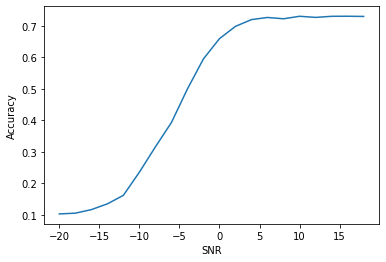

In [ ]:
plt.plot(snrs, acc)
plt.xlabel("SNR")
plt.ylabel("Accuracy")

### Integral

In [ ]:
lstm = getLSTM((2,129))
X_train, Y_t, X_val, Y_v, X_test, Y_ts = split_data(X_integ, labels)
Y_train = arange_output(Y_t)
Y_val = arange_output(Y_v)
Y_test = arange_output(Y_ts)
lstm.fit(X_train, Y_train, batch_size=1024, epochs=100, validation_data=(X_val, Y_val))

Epoch 1/100
780/780 [==============================] - 51s 61ms/step - loss: 2.2746 - categorical_accuracy: 0.1168 - val_loss: 2.1176 - val_categorical_accuracy: 0.1733
Epoch 2/100
780/780 [==============================] - 48s 62ms/step - loss: 2.1082 - categorical_accuracy: 0.1788 - val_loss: 2.0841 - val_categorical_accuracy: 0.1899
Epoch 3/100
780/780 [==============================] - 47s 60ms/step - loss: 2.0878 - categorical_accuracy: 0.1871 - val_loss: 2.0718 - val_categorical_accuracy: 0.1920
Epoch 4/100
780/780 [==============================] - 46s 59ms/step - loss: 2.0749 - categorical_accuracy: 0.1914 - val_loss: 2.0624 - val_categorical_accuracy: 0.1984
Epoch 5/100
780/780 [==============================] - 46s 59ms/step - loss: 2.0629 - categorical_accuracy: 0.1969 - val_loss: 2.0518 - val_categorical_accuracy: 0.2025
Epoch 6/100
780/780 [==============================] - 45s 58ms/step - loss: 2.0547 - categorical_accuracy: 0.2003 - val_loss: 2.0440 - val_categorical_acc

In [ ]:
lstm.evaluate(X_test, Y_test, batch_size=1024)

352/352 [==============================] - 5s 15ms/step - loss: 1.6130 - categorical_accuracy: 0.3493


[1.6129812002182007, 0.3492777645587921]

In [ ]:
acc = []
for snr in snrs:
  print("SNR ==> ", snr)
  X_test_snr = X_test[np.argwhere(Y_ts[:,1] == str(snr))]
  X_test_snr = X_test_snr.reshape((X_test_snr.shape[0], 2, 129))
  Y_test_snr = Y_test[np.argwhere(Y_ts[:,1] == str(snr))]
  Y_test_snr = Y_test_snr.reshape(Y_test_snr.shape[0], 10)
  lstm.evaluate(X_test_snr, Y_test_snr)

  y_pred = lstm.predict(X_test_snr)
  cm = confusion_matrix(Y_test_snr.argmax(axis=1), y_pred.argmax(axis=1))
  print(cm)
  true_values = np.sum(np.diag(cm))
  accuracy = true_values / np.sum(cm)
  print("Accuracy: ", accuracy)
  acc.append(accuracy)
  print()
acc = np.array(acc)

SNR ==>  -20
554/554 [==============================] - 1s 2ms/step - loss: 2.3733 - categorical_accuracy: 0.1050
[[ 44 377 567 435 159  36   0   0 129  67]
 [ 38 445 469 427 150  33   1   1 124  91]
 [ 36 345 519 452 175  31   0   0 131  62]
 [ 33 327 526 461 173  30   4   0 132  77]
 [ 38 333 546 462 182  38   2   0 130  61]
 [ 45 351 540 440 170  26   1   0 116  62]
 [ 38 327 509 438 177  40   1   0 130  64]
 [ 48 316 514 432 192  39   1   0 145  85]
 [ 46 380 545 433 178  50   0   0 110  63]
 [ 45 411 492 430 165  34   3   0 120  74]]
Accuracy:  0.105049365303244

SNR ==>  -18
560/560 [==============================] - 1s 2ms/step - loss: 2.3613 - categorical_accuracy: 0.1095
[[ 43 382 537 416 175  35   1   0 124  79]
 [ 29 465 480 418 138  43   0   0 109  79]
 [ 40 363 566 465 180  34   2   1 144  73]
 [ 28 365 533 488 181  32   1   0 111  62]
 [ 49 369 535 414 168  34   1   0 142  62]
 [ 34 334 525 423 172  29   5   0 145  69]
 [ 51 347 506 468 176  34   1   0 162  55]
 [ 81 281 

Text(0, 0.5, 'Accuracy')

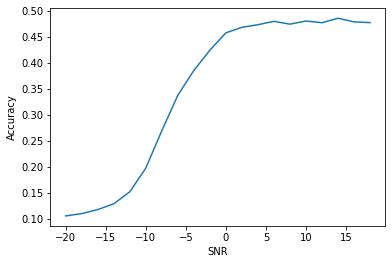

In [ ]:
plt.plot(snrs, acc)
plt.xlabel("SNR")
plt.ylabel("Accuracy")

### Raw, derivative

In [ ]:
lstm = getLSTM((4,128))
X_train, Y_t, X_val, Y_v, X_test, Y_ts = split_data(X_raw_der, labels)
Y_train = arange_output(Y_t)
Y_val = arange_output(Y_v)
Y_test = arange_output(Y_ts)
lstm.fit(X_train, Y_train, batch_size=1024, epochs=100, validation_data=(X_val, Y_val))

Epoch 1/100
780/780 [==============================] - 65s 79ms/step - loss: 1.9595 - categorical_accuracy: 0.2505 - val_loss: 1.5696 - val_categorical_accuracy: 0.3760
Epoch 2/100
780/780 [==============================] - 59s 76ms/step - loss: 1.5265 - categorical_accuracy: 0.3813 - val_loss: 1.4407 - val_categorical_accuracy: 0.4016
Epoch 3/100
780/780 [==============================] - 60s 76ms/step - loss: 1.4139 - categorical_accuracy: 0.4067 - val_loss: 1.3863 - val_categorical_accuracy: 0.4143
Epoch 4/100
780/780 [==============================] - 61s 79ms/step - loss: 1.3653 - categorical_accuracy: 0.4189 - val_loss: 1.3595 - val_categorical_accuracy: 0.4224
Epoch 5/100
780/780 [==============================] - 61s 78ms/step - loss: 1.3353 - categorical_accuracy: 0.4290 - val_loss: 1.3423 - val_categorical_accuracy: 0.4318
Epoch 6/100
780/780 [==============================] - 60s 77ms/step - loss: 1.3113 - categorical_accuracy: 0.4409 - val_loss: 1.3226 - val_categorical_acc

In [ ]:
lstm.evaluate(X_test, Y_test, batch_size=1024)

352/352 [==============================] - 12s 35ms/step - loss: 1.4091 - categorical_accuracy: 0.4979


[1.409102201461792, 0.49790555238723755]

In [ ]:
acc = []
for snr in snrs:
  print("SNR ==> ", snr)
  X_test_snr = X_test[np.argwhere(Y_ts[:,1] == str(snr))]
  X_test_snr = X_test_snr.reshape((X_test_snr.shape[0], 4, 128))
  Y_test_snr = Y_test[np.argwhere(Y_ts[:,1] == str(snr))]
  Y_test_snr = Y_test_snr.reshape(Y_test_snr.shape[0], 10)
  lstm.evaluate(X_test_snr, Y_test_snr)

  y_pred = lstm.predict(X_test_snr)
  cm = confusion_matrix(Y_test_snr.argmax(axis=1), y_pred.argmax(axis=1))
  print(cm)
  true_values = np.sum(np.diag(cm))
  accuracy = true_values / np.sum(cm)
  print("Accuracy: ", accuracy)
  acc.append(accuracy)
  print()
acc = np.array(acc)

SNR ==>  -20
554/554 [==============================] - 3s 5ms/step - loss: 2.6546 - categorical_accuracy: 0.1035
[[340 242 273 236 284  31  17   2 166 187]
 [314 259 297 241 285  37  14   2 168 163]
 [317 246 269 251 277  45  13   0 152 157]
 [329 231 280 283 296  30  19   0 163 145]
 [332 220 266 295 310  48  11   2 169 155]
 [354 235 279 289 249  45  16   1 170 155]
 [313 212 283 275 307  38  18   4 158 163]
 [303 198 300 264 306  41  25   0 178 136]
 [297 230 303 278 282  38  18   3 144 135]
 [331 269 279 270 266  43  17   3 169 166]]
Accuracy:  0.10346967559943583

SNR ==>  -18
564/564 [==============================] - 3s 5ms/step - loss: 2.6346 - categorical_accuracy: 0.1096
[[344 223 273 253 259  37  17   1 175 180]
 [285 333 290 285 252  42  19   2 154 186]
 [322 233 294 318 285  38  18   2 156 160]
 [335 242 291 284 301  46  14   2 173 154]
 [300 240 265 284 277  38  16   0 163 161]
 [336 225 292 288 276  52  24   4 159 161]
 [306 222 307 259 279  73  27   2 189 147]
 [273 19

Text(0, 0.5, 'Accuracy')

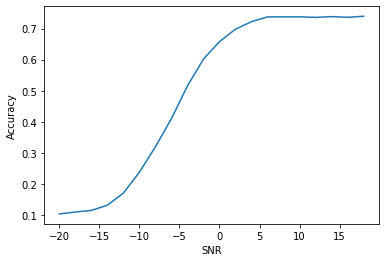

In [ ]:
plt.plot(snrs, acc)
plt.xlabel("SNR")
plt.ylabel("Accuracy")

### Raw, integral

In [ ]:
lstm = getLSTM((4,129))
X_train, Y_t, X_val, Y_v, X_test, Y_ts = split_data(X_raw_int, labels)
Y_train = arange_output(Y_t)
Y_val = arange_output(Y_v)
Y_test = arange_output(Y_ts)
lstm.fit(X_train, Y_train, batch_size=1024, epochs=100, validation_data=(X_val, Y_val))

Epoch 1/100
780/780 [==============================] - 55s 67ms/step - loss: 2.1590 - categorical_accuracy: 0.1661 - val_loss: 2.0227 - val_categorical_accuracy: 0.2127
Epoch 2/100
780/780 [==============================] - 51s 66ms/step - loss: 2.0134 - categorical_accuracy: 0.2178 - val_loss: 2.0074 - val_categorical_accuracy: 0.2230
Epoch 3/100
780/780 [==============================] - 51s 66ms/step - loss: 2.0007 - categorical_accuracy: 0.2222 - val_loss: 1.9809 - val_categorical_accuracy: 0.2310
Epoch 4/100
780/780 [==============================] - 51s 65ms/step - loss: 1.9659 - categorical_accuracy: 0.2351 - val_loss: 1.9472 - val_categorical_accuracy: 0.2435
Epoch 5/100
780/780 [==============================] - 52s 66ms/step - loss: 1.9394 - categorical_accuracy: 0.2458 - val_loss: 1.9357 - val_categorical_accuracy: 0.2489
Epoch 6/100
780/780 [==============================] - 52s 66ms/step - loss: 1.9246 - categorical_accuracy: 0.2510 - val_loss: 1.9115 - val_categorical_acc

In [ ]:
lstm.evaluate(X_test, Y_test, batch_size=1024)

352/352 [==============================] - 10s 28ms/step - loss: 1.1856 - categorical_accuracy: 0.4970


[1.1856476068496704, 0.49702221155166626]

In [ ]:
acc = []
for snr in snrs:
  print("SNR ==> ", snr)
  X_test_snr = X_test[np.argwhere(Y_ts[:,1] == str(snr))]
  X_test_snr = X_test_snr.reshape((X_test_snr.shape[0], 4, 129))
  Y_test_snr = Y_test[np.argwhere(Y_ts[:,1] == str(snr))]
  Y_test_snr = Y_test_snr.reshape(Y_test_snr.shape[0], 10)
  lstm.evaluate(X_test_snr, Y_test_snr)

  y_pred = lstm.predict(X_test_snr)
  cm = confusion_matrix(Y_test_snr.argmax(axis=1), y_pred.argmax(axis=1))
  print(cm)
  true_values = np.sum(np.diag(cm))
  accuracy = true_values / np.sum(cm)
  print("Accuracy: ", accuracy)
  acc.append(accuracy)
  print()
acc = np.array(acc)

SNR ==>  -20
562/562 [==============================] - 2s 3ms/step - loss: 2.3744 - categorical_accuracy: 0.1061
[[319 286 661 232 185   3   1   1  63  35]
 [341 328 540 235 175   6   1   0  65  50]
 [326 296 642 286 197  10   1   0  81  39]
 [324 253 655 296 161   8   1   0  72  43]
 [332 272 618 309 178   7   3   0  77  38]
 [331 286 621 243 201  11   1   0  66  48]
 [327 247 623 247 175  13   3   0  82  39]
 [340 254 630 274 206  18   5   0 104  49]
 [318 252 629 251 157  11   2   0  75  52]
 [344 305 556 254 139   7   1   0  66  55]]
Accuracy:  0.10612131329994436

SNR ==>  -18
561/561 [==============================] - 2s 3ms/step - loss: 2.3509 - categorical_accuracy: 0.1093
[[302 231 639 261 175   4   3   0  63  44]
 [364 394 563 208 152  10   3   0  58  69]
 [351 250 628 259 181   6   2   0  76  38]
 [336 296 651 280 155  10   4   0  70  39]
 [297 281 621 248 200   6   2   0  86  50]
 [316 277 621 301 180  13   0   0  86  39]
 [303 246 654 244 170  10   3   1  86  55]
 [349 18

Text(0, 0.5, 'Accuracy')

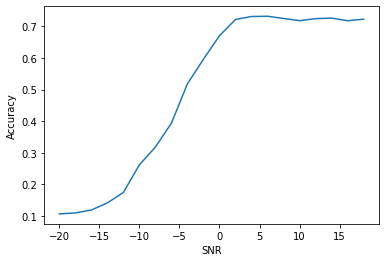

In [ ]:
plt.plot(snrs, acc)
plt.xlabel("SNR")
plt.ylabel("Accuracy")

### Derivative, integral

In [ ]:
lstm = getLSTM((4,129))
X_train, Y_t, X_val, Y_v, X_test, Y_ts = split_data(X_der_int, labels)
Y_train = arange_output(Y_t)
Y_val = arange_output(Y_v)
Y_test = arange_output(Y_ts)
lstm.fit(X_train, Y_train, batch_size=1024, epochs=100, validation_data=(X_val, Y_val))

Epoch 1/100
780/780 [==============================] - 55s 67ms/step - loss: 1.9252 - categorical_accuracy: 0.2497 - val_loss: 1.5476 - val_categorical_accuracy: 0.3752
Epoch 2/100
780/780 [==============================] - 51s 66ms/step - loss: 1.4982 - categorical_accuracy: 0.3862 - val_loss: 1.4126 - val_categorical_accuracy: 0.4051
Epoch 3/100
780/780 [==============================] - 53s 69ms/step - loss: 1.3842 - categorical_accuracy: 0.4132 - val_loss: 1.3458 - val_categorical_accuracy: 0.4248
Epoch 4/100
780/780 [==============================] - 52s 67ms/step - loss: 1.3280 - categorical_accuracy: 0.4322 - val_loss: 1.3076 - val_categorical_accuracy: 0.4459
Epoch 5/100
780/780 [==============================] - 52s 66ms/step - loss: 1.2843 - categorical_accuracy: 0.4551 - val_loss: 1.2718 - val_categorical_accuracy: 0.4671
Epoch 6/100
780/780 [==============================] - 52s 67ms/step - loss: 1.2449 - categorical_accuracy: 0.4744 - val_loss: 1.2424 - val_categorical_acc

In [ ]:
lstm.evaluate(X_test, Y_test, batch_size=1024)

352/352 [==============================] - 10s 27ms/step - loss: 1.4258 - categorical_accuracy: 0.5069


[1.4257780313491821, 0.5069416761398315]

In [ ]:
acc = []
for snr in snrs:
  print("SNR ==> ", snr)
  X_test_snr = X_test[np.argwhere(Y_ts[:,1] == str(snr))]
  X_test_snr = X_test_snr.reshape((X_test_snr.shape[0], 4, 129))
  Y_test_snr = Y_test[np.argwhere(Y_ts[:,1] == str(snr))]
  Y_test_snr = Y_test_snr.reshape(Y_test_snr.shape[0], 10)
  lstm.evaluate(X_test_snr, Y_test_snr)

  y_pred = lstm.predict(X_test_snr)
  cm = confusion_matrix(Y_test_snr.argmax(axis=1), y_pred.argmax(axis=1))
  print(cm)
  true_values = np.sum(np.diag(cm))
  accuracy = true_values / np.sum(cm)
  print("Accuracy: ", accuracy)
  acc.append(accuracy)
  print()
acc = np.array(acc)

SNR ==>  -20
566/566 [==============================] - 2s 3ms/step - loss: 2.6485 - categorical_accuracy: 0.1054
[[527 170 287 177 292  62  25   7 125 121]
 [489 184 277 195 257  61  30  10 118 145]
 [518 139 334 196 294  67  25   9 113 136]
 [495 167 326 177 307  52  16   7 128 126]
 [542 174 301 207 300  64  23  10 123 114]
 [501 148 317 203 284  63  17  18 116 101]
 [480 170 303 182 317  61  24  12 118 126]
 [486 136 289 214 305  80  35  14 135 130]
 [521 165 301 221 278  63  23  13 137 117]
 [513 181 313 198 252  54  29   9 119 146]]
Accuracy:  0.10537955437607122

SNR ==>  -18
568/568 [==============================] - 2s 4ms/step - loss: 2.6585 - categorical_accuracy: 0.1098
[[519 154 323 192 292  67  23   7 119 131]
 [468 252 321 191 280  58  28  14 122 158]
 [518 153 314 168 279  61  27   9 139 145]
 [494 183 315 205 296  71  16  10 131 120]
 [530 158 286 200 306  68  29  11 100 108]
 [473 133 321 183 275  64  23   8 124 130]
 [480 155 336 201 275  59  22  10 142 134]
 [434 12

Text(0, 0.5, 'Accuracy')

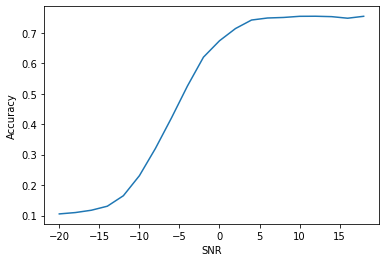

In [ ]:
plt.plot(snrs, acc)
plt.xlabel("SNR")
plt.ylabel("Accuracy")

### Raw, derivative, integral

In [ ]:
lstm = getLSTM((6,129))
X_train, Y_t, X_val, Y_v, X_test, Y_ts = split_data(X_raw_der_int, labels)
Y_train = arange_output(Y_t)
Y_val = arange_output(Y_v)
Y_test = arange_output(Y_ts)
lstm.fit(X_train, Y_train, batch_size=1024, epochs=100, validation_data=(X_val, Y_val))

Epoch 1/100
780/780 [==============================] - 93s 116ms/step - loss: 1.9058 - categorical_accuracy: 0.2539 - val_loss: 1.5282 - val_categorical_accuracy: 0.3752
Epoch 2/100
780/780 [==============================] - 91s 117ms/step - loss: 1.4890 - categorical_accuracy: 0.3890 - val_loss: 1.4316 - val_categorical_accuracy: 0.4017
Epoch 3/100
780/780 [==============================] - 92s 118ms/step - loss: 1.3949 - categorical_accuracy: 0.4131 - val_loss: 1.3533 - val_categorical_accuracy: 0.4246
Epoch 4/100
780/780 [==============================] - 90s 116ms/step - loss: 1.3274 - categorical_accuracy: 0.4355 - val_loss: 1.3178 - val_categorical_accuracy: 0.4405
Epoch 5/100
780/780 [==============================] - 92s 118ms/step - loss: 1.2877 - categorical_accuracy: 0.4527 - val_loss: 1.2832 - val_categorical_accuracy: 0.4596
Epoch 6/100
780/780 [==============================] - 93s 119ms/step - loss: 1.2539 - categorical_accuracy: 0.4701 - val_loss: 1.2568 - val_categoric

In [ ]:
lstm.evaluate(X_test, Y_test, batch_size=1024)

352/352 [==============================] - 18s 50ms/step - loss: 1.4061 - categorical_accuracy: 0.5078


[1.4061137437820435, 0.5078277587890625]

In [ ]:
acc = []
for snr in snrs:
  print("SNR ==> ", snr)
  X_test_snr = X_test[np.argwhere(Y_ts[:,1] == str(snr))]
  X_test_snr = X_test_snr.reshape((X_test_snr.shape[0], 6, 129))
  Y_test_snr = Y_test[np.argwhere(Y_ts[:,1] == str(snr))]
  Y_test_snr = Y_test_snr.reshape(Y_test_snr.shape[0], 10)
  lstm.evaluate(X_test_snr, Y_test_snr)

  y_pred = lstm.predict(X_test_snr)
  cm = confusion_matrix(Y_test_snr.argmax(axis=1), y_pred.argmax(axis=1))
  print(cm)
  true_values = np.sum(np.diag(cm))
  accuracy = true_values / np.sum(cm)
  print("Accuracy: ", accuracy)
  acc.append(accuracy)
  print()
acc = np.array(acc)

SNR ==>  -20
560/560 [==============================] - 3s 5ms/step - loss: 2.6005 - categorical_accuracy: 0.1026
[[437 169 331 246 226  51  12   5 142 130]
 [436 231 310 246 179  66  11   6 143 156]
 [431 175 330 266 201  59  14   8 178 133]
 [443 159 313 241 211  77  15  10 157 103]
 [426 177 320 281 218  69  20  14 164 144]
 [444 155 325 266 215  59  18   7 170 126]
 [458 179 336 263 231  65  19  10 172 113]
 [420 179 313 245 233  68  28   8 167 121]
 [455 183 321 265 200  62  13   9 168 137]
 [414 222 323 234 200  56  31   8 162 124]]
Accuracy:  0.10257126886528788

SNR ==>  -18
561/561 [==============================] - 3s 6ms/step - loss: 2.5927 - categorical_accuracy: 0.1081
[[434 190 344 230 212  62  15   4 161 105]
 [422 253 265 216 180  59   8   5 192 168]
 [441 188 319 239 204  73  19   8 172 127]
 [446 198 324 238 214  66  16   8 163 123]
 [407 150 303 258 224  59  10   8 174 127]
 [475 181 340 252 191  92   8  10 162 114]
 [463 184 366 261 200  66  18  13 160 127]
 [369 14

Text(0, 0.5, 'Accuracy')

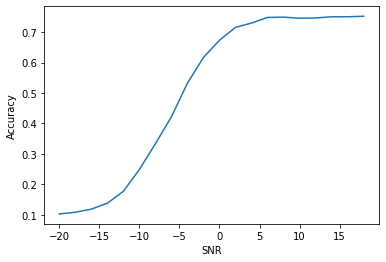

In [ ]:
plt.plot(snrs, acc)
plt.xlabel("SNR")
plt.ylabel("Accuracy")